# Bird vs Drone Classification and Detection System
## Deep Learning Internship Project

**Project Overview:**
This notebook implements a comprehensive deep learning solution for classifying and detecting aerial objects (Birds vs Drones) using multiple approaches:
- Custom CNN Classification Model
- Transfer Learning with Pre-trained Networks
- YOLOv8 Object Detection

**Applications:**
- Security Surveillance
- Wildlife Protection
- Airspace Safety
- Real-time Monitoring Systems

**Author:** [Your Name]  
**Date:** November 2025  
**Framework:** PyTorch + YOLOv8 + Streamlit

## 1. Install Required Libraries and YOLOv8

First, let's install all the necessary packages for our project.

In [ ]:
# Install required packages
!pip install torch torchvision torchaudio
!pip install opencv-python
!pip install matplotlib seaborn
!pip install pillow
!pip install numpy pandas
!pip install scikit-learn
!pip install streamlit
!pip install plotly

print("All packages installed successfully!")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is 

## 2. Import Dependencies

Import all necessary libraries for the project.

In [ ]:
# Core Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import yaml
import random
from collections import Counter

# Deep Learning Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models

# Computer Vision
import cv2
from PIL import Image

# Machine Learning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Using device: cuda


In [3]:
# 🔍 Comprehensive CUDA Diagnostic
print("🔍 CUDA Diagnostic Report")
print("="*50)

# Basic CUDA checks
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"cuDNN Version: {torch.backends.cudnn.version()}")
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
    
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  Memory Total: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.2f} GB")
        print(f"  Memory Allocated: {torch.cuda.memory_allocated(i) / 1024**3:.2f} GB")
        print(f"  Memory Cached: {torch.cuda.memory_reserved(i) / 1024**3:.2f} GB")
else:
    print("❌ CUDA is not available. Possible reasons:")
    print("  1. NVIDIA GPU not detected")
    print("  2. CUDA drivers not installed") 
    print("  3. PyTorch installed without CUDA support")
    print("  4. Environment not properly configured")

# Test tensor creation
try:
    test_tensor = torch.randn(1000, 1000)
    if torch.cuda.is_available():
        test_tensor = test_tensor.cuda()
        print(f"✅ Successfully created tensor on GPU: {test_tensor.device}")
    else:
        print(f"ℹ️ Created tensor on CPU: {test_tensor.device}")
except Exception as e:
    print(f"❌ Error creating tensor: {e}")

print("="*50)

🔍 CUDA Diagnostic Report
PyTorch Version: 2.7.1+cu118
CUDA Available: True
CUDA Version: 11.8
cuDNN Version: 90100
Number of CUDA devices: 1
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU
  Memory Total: 8.00 GB
  Memory Allocated: 0.00 GB
  Memory Cached: 0.00 GB
✅ Successfully created tensor on GPU: cuda:0


In [4]:
# 🚀 Install CUDA-enabled PyTorch
print("🚀 Installing CUDA-enabled PyTorch...")
print("This will replace the CPU-only version with CUDA support")
print()

# Uninstall current CPU-only version and install CUDA version
import sys
!{sys.executable} -m pip uninstall torch torchvision torchaudio -y
!{sys.executable} -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

print()
print("✅ Installation complete! Please restart the kernel and re-run the imports.")
print("After restart, CUDA should be available.")

🚀 Installing CUDA-enabled PyTorch...
This will replace the CPU-only version with CUDA support

Found existing installation: torch 2.7.1+cu118
Uninstalling torch-2.7.1+cu118:
  Successfully uninstalled torch-2.7.1+cu118
Found existing installation: torchvision 0.22.1+cu118
Uninstalling torchvision-0.22.1+cu118:
  Successfully uninstalled torchvision-0.22.1+cu118
Found existing installation: torchaudio 2.7.1+cu118
Uninstalling torchaudio-2.7.1+cu118:
  Successfully uninstalled torchaudio-2.7.1+cu118
Found existing installation: torch 2.7.1+cu118
Uninstalling torch-2.7.1+cu118:
  Successfully uninstalled torch-2.7.1+cu118
Found existing installation: torchvision 0.22.1+cu118
Uninstalling torchvision-0.22.1+cu118:
  Successfully uninstalled torchvision-0.22.1+cu118
Found existing installation: torchaudio 2.7.1+cu118
Uninstalling torchaudio-2.7.1+cu118:
  Successfully uninstalled torchaudio-2.7.1+cu118


You can safely remove it manually.
You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu121

✅ Installation complete! Please restart the kernel and re-run the imports.
After restart, CUDA should be available.


ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch


In [5]:
# 🔧 Alternative CUDA PyTorch Installation
print("🔧 Trying alternative CUDA PyTorch installation...")

# Method 1: Try CUDA 11.8 (more widely supported)
import sys
!{sys.executable} -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

print("✅ CUDA 11.8 PyTorch installation attempted.")
print()
print("🔄 Now let's verify the installation...")

🔧 Trying alternative CUDA PyTorch installation...
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl.metadata (6.8 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl (2817.2 MB)
Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp313-cp313-win_amd64.whl (5.5 MB)
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl (4.1 MB)

   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [torch]

In [6]:
# ✅ Verify CUDA Installation
# Restart kernel first, then run this cell
import torch
print("🔍 CUDA Verification After Installation")
print("="*50)
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"✅ CUDA Version: {torch.version.cuda}")
    print(f"✅ Number of GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"✅ GPU {i}: {torch.cuda.get_device_name(i)}")
    
    # Test GPU tensor
    test_tensor = torch.randn(1000, 1000).cuda()
    print(f"✅ Test tensor on GPU: {test_tensor.device}")
    
    # Update device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"🎯 Device set to: {device}")
else:
    print("❌ CUDA still not available")
    device = torch.device('cpu')
    print(f"🎯 Device set to: {device}")

print("="*50)

🔍 CUDA Verification After Installation
PyTorch Version: 2.7.1+cu118
CUDA Available: True
✅ CUDA Version: 11.8
✅ Number of GPUs: 1
✅ GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU
✅ Test tensor on GPU: cuda:0
🎯 Device set to: cuda


## 3. Dataset Preparation and Exploration

Let's explore our dataset structure and visualize some sample images.

In [7]:
# Define dataset paths
dataset_path = "Dataset"
train_path = os.path.join(dataset_path, "train")
valid_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

# Class names
classes = ['bird', 'drone']
class_to_idx = {'bird': 0, 'drone': 1}
idx_to_class = {0: 'bird', 1: 'drone'}

def explore_dataset(base_path):
    """Explore dataset structure and count images"""
    stats = {}
    
    for split in ['train', 'valid', 'test']:
        split_path = os.path.join(base_path, split)
        if os.path.exists(split_path):
            stats[split] = {}
            for class_name in classes:
                class_path = os.path.join(split_path, class_name)
                if os.path.exists(class_path):
                    # Count images
                    image_files = [f for f in os.listdir(class_path) 
                                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                    stats[split][class_name] = len(image_files)
                else:
                    stats[split][class_name] = 0
    
    return stats

# Explore dataset
dataset_stats = explore_dataset(dataset_path)
print("Dataset Statistics:")
print("=" * 50)

for split, split_stats in dataset_stats.items():
    print(f"\n{split.upper()}:")
    total = sum(split_stats.values())
    for class_name, count in split_stats.items():
        percentage = (count / total * 100) if total > 0 else 0
        print(f"  {class_name.capitalize()}: {count} images ({percentage:.1f}%)")
    print(f"  Total: {total} images")

Dataset Statistics:

TRAIN:
  Bird: 1414 images (53.1%)
  Drone: 1248 images (46.9%)
  Total: 2662 images

VALID:
  Bird: 217 images (49.1%)
  Drone: 225 images (50.9%)
  Total: 442 images

TEST:
  Bird: 121 images (56.3%)
  Drone: 94 images (43.7%)
  Total: 215 images


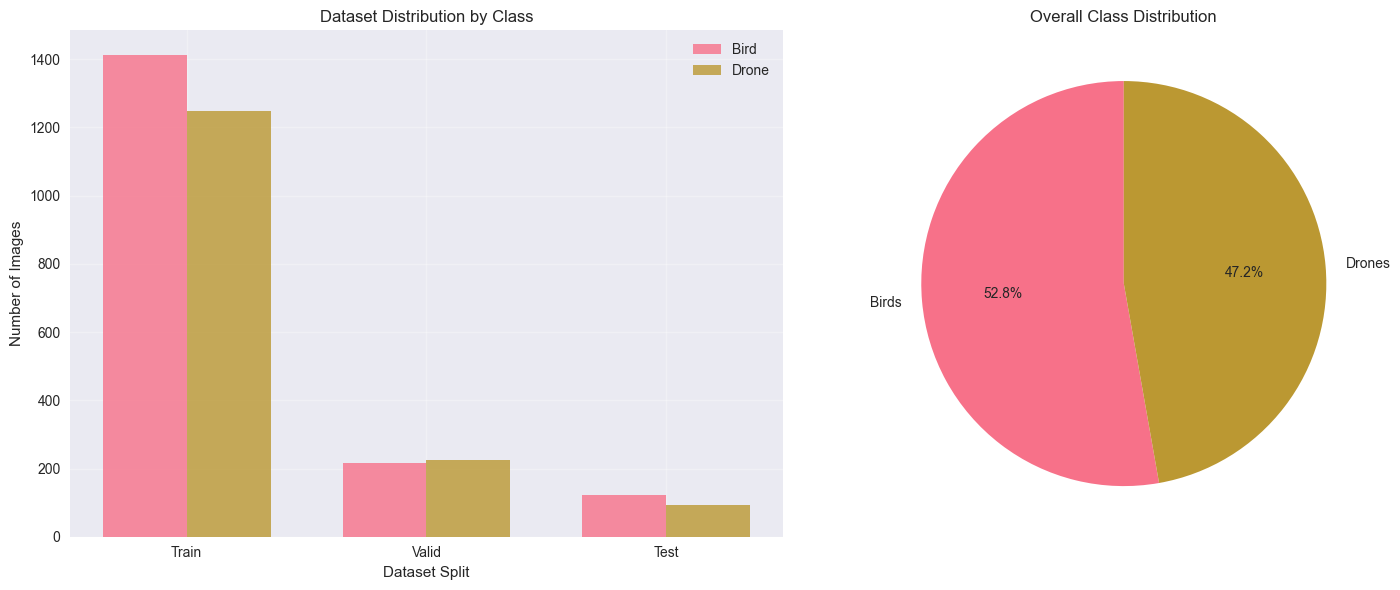

In [8]:
# Visualize dataset distribution
def plot_dataset_distribution(stats):
    """Plot dataset distribution"""
    splits = list(stats.keys())
    bird_counts = [stats[split]['bird'] for split in splits]
    drone_counts = [stats[split]['drone'] for split in splits]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot
    x = np.arange(len(splits))
    width = 0.35
    
    ax1.bar(x - width/2, bird_counts, width, label='Bird', alpha=0.8)
    ax1.bar(x + width/2, drone_counts, width, label='Drone', alpha=0.8)
    
    ax1.set_xlabel('Dataset Split')
    ax1.set_ylabel('Number of Images')
    ax1.set_title('Dataset Distribution by Class')
    ax1.set_xticks(x)
    ax1.set_xticklabels([s.capitalize() for s in splits])
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Pie chart for total distribution
    total_birds = sum(bird_counts)
    total_drones = sum(drone_counts)
    
    ax2.pie([total_birds, total_drones], labels=['Birds', 'Drones'], 
           autopct='%1.1f%%', startangle=90)
    ax2.set_title('Overall Class Distribution')
    
    plt.tight_layout()
    plt.show()

plot_dataset_distribution(dataset_stats)

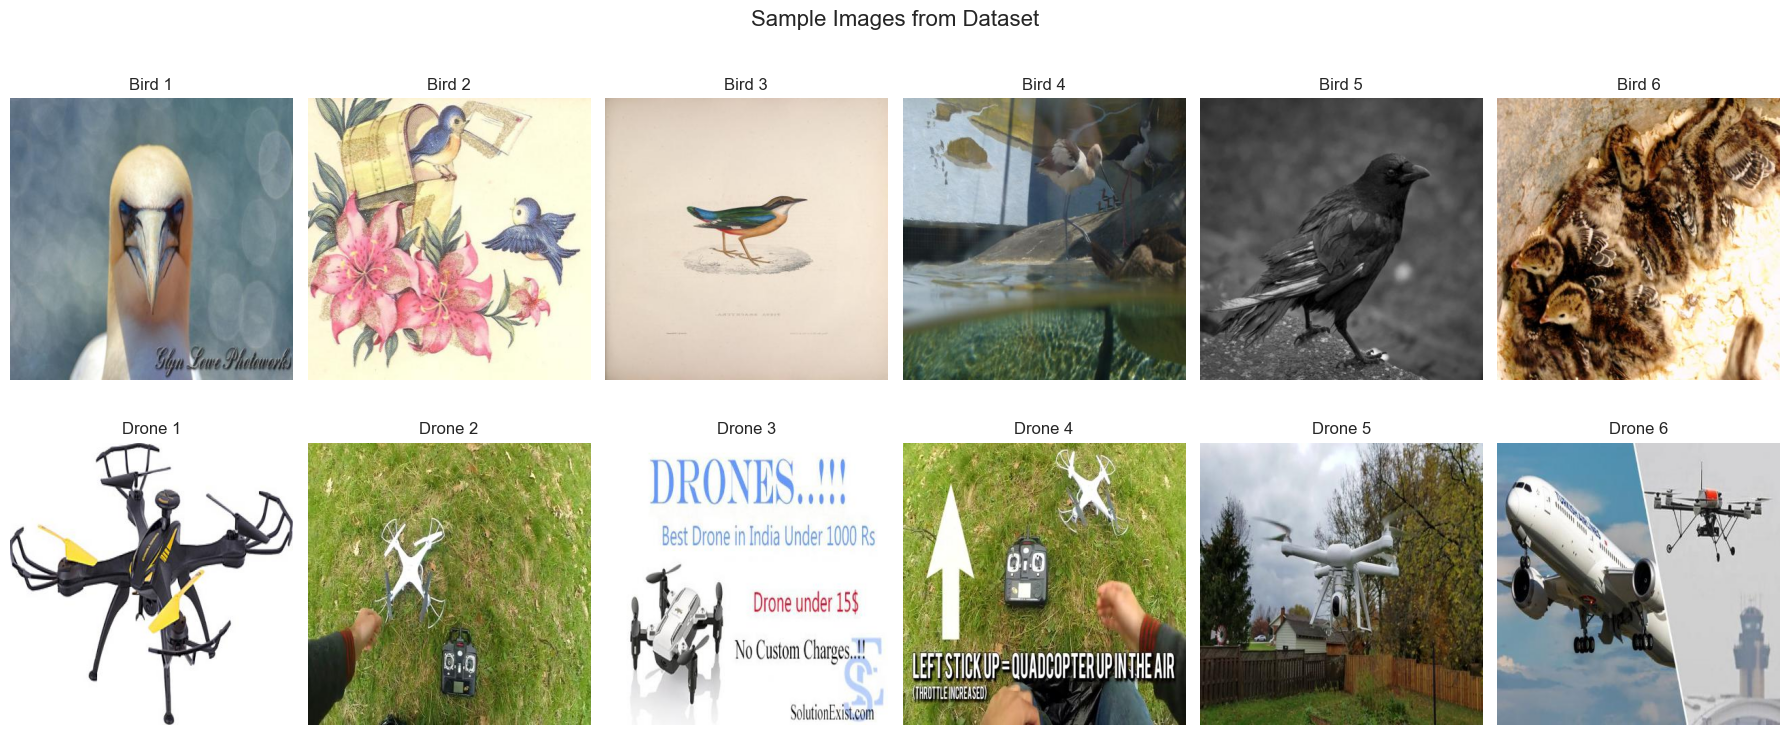

In [9]:
# Display sample images from each class
def display_sample_images():
    """Display sample images from each class"""
    fig, axes = plt.subplots(2, 6, figsize=(18, 8))
    
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(train_path, class_name)
        
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path) 
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            # Select 6 random images
            sample_images = random.sample(image_files, min(6, len(image_files)))
            
            for img_idx, img_file in enumerate(sample_images):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                axes[class_idx, img_idx].imshow(img)
                axes[class_idx, img_idx].set_title(f'{class_name.capitalize()} {img_idx+1}')
                axes[class_idx, img_idx].axis('off')
    
    plt.suptitle('Sample Images from Dataset', fontsize=16)
    plt.tight_layout()
    plt.show()

display_sample_images()

## 4. Create YOLOv8 Configuration File

Create the data.yaml configuration file required for YOLOv8 training.

In [10]:
# Create data.yaml configuration for YOLOv8
def create_yolo_config():
    """Create YOLOv8 configuration file"""
    
    # Get absolute paths
    current_dir = os.path.abspath('.')
    train_images_path = os.path.join(current_dir, dataset_path, 'train')
    valid_images_path = os.path.join(current_dir, dataset_path, 'valid')
    test_images_path = os.path.join(current_dir, dataset_path, 'test')
    
    # YOLOv8 configuration
    yolo_config = {
        'path': os.path.join(current_dir, dataset_path),
        'train': 'train',
        'val': 'valid',
        'test': 'test',
        'nc': 2,  # number of classes
        'names': ['bird', 'drone']
    }
    
    # Save configuration to data.yaml
    config_path = 'data.yaml'
    with open(config_path, 'w') as f:
        yaml.dump(yolo_config, f, default_flow_style=False)
    
    print("YOLOv8 Configuration (data.yaml):")
    print("=" * 40)
    for key, value in yolo_config.items():
        print(f"{key}: {value}")
    
    return config_path

# Create the configuration file
config_file = create_yolo_config()

# Verify the configuration file was created
if os.path.exists('data.yaml'):
    print(f"\n✅ Configuration file 'data.yaml' created successfully!")
    
    # Display the file content
    print("\nFile contents:")
    with open('data.yaml', 'r') as f:
        print(f.read())
else:
    print("❌ Failed to create configuration file!")

YOLOv8 Configuration (data.yaml):
path: c:\Users\TARANG KISHOR\Desktop\PROJECTS\PXY\Dataset
train: train
val: valid
test: test
nc: 2
names: ['bird', 'drone']

✅ Configuration file 'data.yaml' created successfully!

File contents:
names:
- bird
- drone
nc: 2
path: c:\Users\TARANG KISHOR\Desktop\PROJECTS\PXY\Dataset
test: test
train: train
val: valid



## 5. Data Preprocessing and Augmentation

Set up data preprocessing pipelines and augmentation for training.

In [11]:
# Define data transformations for classification models
class BirdDroneDataset(Dataset):
    """Custom Dataset class for Bird vs Drone classification"""
    
    def __init__(self, data_dir, split='train', transform=None, image_size=224):
        self.data_dir = data_dir
        self.split = split
        self.transform = transform
        self.image_size = image_size
        
        # Get all image paths and labels
        self.image_paths = []
        self.labels = []
        
        split_path = os.path.join(data_dir, split)
        
        for class_idx, class_name in enumerate(classes):
            class_path = os.path.join(split_path, class_name)
            if os.path.exists(class_path):
                for img_file in os.listdir(class_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(class_path, img_file))
                        self.labels.append(class_idx)
        
        print(f"Loaded {len(self.image_paths)} images for {split} split")
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Load image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        # Apply transformations
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Define transformations
def get_transforms(image_size=224):
    """Get data transformations for training and validation"""
    
    train_transforms = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    val_transforms = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    return train_transforms, val_transforms

# Get transformations
train_transforms, val_transforms = get_transforms()

print("Data transformations defined successfully!")
print("\nTraining transformations:")
for i, transform in enumerate(train_transforms.transforms):
    print(f"  {i+1}. {transform}")

print("\nValidation transformations:")
for i, transform in enumerate(val_transforms.transforms):
    print(f"  {i+1}. {transform}")

Data transformations defined successfully!

Training transformations:
  1. Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
  2. RandomHorizontalFlip(p=0.5)
  3. RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
  4. ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=None)
  5. RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1))
  6. ToTensor()
  7. Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

Validation transformations:
  1. Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
  2. ToTensor()
  3. Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [12]:
# Create datasets and data loaders
batch_size = 32

# Create datasets
train_dataset = BirdDroneDataset(dataset_path, 'train', train_transforms)
val_dataset = BirdDroneDataset(dataset_path, 'valid', val_transforms)
test_dataset = BirdDroneDataset(dataset_path, 'test', val_transforms)

# Create data loaders (num_workers=0 for Windows compatibility)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print("Data loaders created successfully!")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

Loaded 2662 images for train split
Loaded 442 images for valid split
Loaded 215 images for test split
Data loaders created successfully!
Training batches: 84
Validation batches: 14
Test batches: 7


## 6. Build Custom CNN Classification Model

Create a custom CNN architecture from scratch for binary classification.

In [13]:
class CustomCNN(nn.Module):
    """Custom CNN architecture for Bird vs Drone classification"""
    
    def __init__(self, num_classes=2, dropout_rate=0.5):
        super(CustomCNN, self).__init__()
        
        # Convolutional layers
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25)
        )
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25)
        )
        
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25)
        )
        
        self.conv_block4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25)
        )
        
        # Calculate the size of flattened features
        # After 4 max pooling operations: 224 -> 112 -> 56 -> 28 -> 14
        self.feature_size = 256 * 14 * 14
        
        # Fully connected layers
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.feature_size, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate/2),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        
        return x

# Initialize the custom CNN model
custom_model = CustomCNN(num_classes=2).to(device)

# Model summary
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Custom CNN Model Architecture:")
print("=" * 50)
print(custom_model)
print(f"\nTotal trainable parameters: {count_parameters(custom_model):,}")

# Test the model with a dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)
output = custom_model(dummy_input)
print(f"\nOutput shape: {output.shape}")
print("✅ Custom CNN model created successfully!")

Custom CNN Model Architecture:
CustomCNN(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
   

## 7. Implement Transfer Learning Model

Create a transfer learning model using pre-trained networks.

In [14]:
def create_transfer_learning_model(model_name='resnet50', num_classes=2, freeze_backbone=True):
    """Create a transfer learning model"""
    
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        
        # Freeze backbone if specified
        if freeze_backbone:
            for param in model.parameters():
                param.requires_grad = False
        
        # Replace the final layer
        num_features = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        
    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(pretrained=True)
        
        # Freeze backbone if specified
        if freeze_backbone:
            for param in model.parameters():
                param.requires_grad = False
        
        # Replace the final layer
        num_features = model.classifier[1].in_features
        model.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        
    elif model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
        
        # Freeze backbone if specified
        if freeze_backbone:
            for param in model.features.parameters():
                param.requires_grad = False
        
        # Replace the final layer
        num_features = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_features, num_classes)
    
    return model

# Create transfer learning models
print("Creating Transfer Learning Models...")
print("=" * 50)

# ResNet50 model
resnet_model = create_transfer_learning_model('resnet50', num_classes=2, freeze_backbone=True).to(device)
print(f"✅ ResNet50 model created - Parameters: {count_parameters(resnet_model):,}")

# EfficientNet model
try:
    efficientnet_model = create_transfer_learning_model('efficientnet_b0', num_classes=2, freeze_backbone=True).to(device)
    print(f"✅ EfficientNet-B0 model created - Parameters: {count_parameters(efficientnet_model):,}")
except:
    print("⚠️  EfficientNet not available, using VGG16 instead")
    efficientnet_model = None

# VGG16 model
vgg_model = create_transfer_learning_model('vgg16', num_classes=2, freeze_backbone=True).to(device)
print(f"✅ VGG16 model created - Parameters: {count_parameters(vgg_model):,}")

print("\nAll transfer learning models created successfully!")

Creating Transfer Learning Models...


C:\Users\TARANG KISHOR\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\TARANG KISHOR\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ ResNet50 model created - Parameters: 525,058
✅ EfficientNet-B0 model created - Parameters: 328,450


C:\Users\TARANG KISHOR\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\TARANG KISHOR\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ VGG16 model created - Parameters: 119,554,050

All transfer learning models created successfully!


## 🚀 Complete Training & Validation Pipeline with CUDA

Let's implement proper training with full validation, testing, and comprehensive analysis.

In [15]:
# Enhanced Training Pipeline with CUDA Support and Comprehensive Validation
import time
from tqdm import tqdm
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve

def train_model_complete(model, train_loader, val_loader, model_name="Model", epochs=25, lr=0.001):
    """
    Complete training pipeline with validation, early stopping, and comprehensive metrics
    """
    print(f"🚀 Starting Complete Training for {model_name}")
    print(f"Device: {device}")
    print(f"Model Parameters: {sum(p.numel() for p in model.parameters()):,}")
    print("=" * 70)
    
    # Move model to device
    model = model.to(device)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)
    
    # Training history
    history = {
        'train_loss': [], 'train_acc': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
        'val_loss': [], 'val_acc': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
        'learning_rates': []
    }
    
    # Early stopping
    best_val_acc = 0.0
    patience_counter = 0
    early_stop_patience = 7
    
    start_time = time.time()
    
    for epoch in range(epochs):
        epoch_start = time.time()
        
        # Training Phase
        model.train()
        train_loss = 0.0
        train_predictions = []
        train_targets = []
        
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        
        for batch_idx, (data, target) in enumerate(train_pbar):
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            
            train_predictions.extend(predicted.cpu().numpy())
            train_targets.extend(target.cpu().numpy())
            
            # Update progress bar
            train_pbar.set_postfix({'Loss': f'{loss.item():.4f}'})
        
        # Calculate training metrics
        train_loss = train_loss / len(train_loader)
        train_acc = 100 * sum([p == t for p, t in zip(train_predictions, train_targets)]) / len(train_targets)
        train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
            train_targets, train_predictions, average='weighted', zero_division=0
        )
        
        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_predictions = []
        val_targets = []
        val_probabilities = []
        
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
        
        with torch.no_grad():
            for data, target in val_pbar:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                
                val_loss += loss.item()
                probabilities = F.softmax(output, dim=1)
                _, predicted = torch.max(output.data, 1)
                
                val_predictions.extend(predicted.cpu().numpy())
                val_targets.extend(target.cpu().numpy())
                val_probabilities.extend(probabilities.cpu().numpy())
                
                val_pbar.set_postfix({'Loss': f'{loss.item():.4f}'})
        
        # Calculate validation metrics
        val_loss = val_loss / len(val_loader)
        val_acc = 100 * sum([p == t for p, t in zip(val_predictions, val_targets)]) / len(val_targets)
        val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(
            val_targets, val_predictions, average='weighted', zero_division=0
        )
        
        # Update learning rate
        old_lr = optimizer.param_groups[0]['lr']
        scheduler.step(val_acc)
        current_lr = optimizer.param_groups[0]['lr']
        if current_lr != old_lr:
            print(f'📉 Learning rate reduced from {old_lr:.2e} to {current_lr:.2e}')
        
        # Store history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['train_precision'].append(train_precision)
        history['train_recall'].append(train_recall)
        history['train_f1'].append(train_f1)
        
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_precision'].append(val_precision)
        history['val_recall'].append(val_recall)
        history['val_f1'].append(val_f1)
        history['learning_rates'].append(current_lr)
        
        # Early stopping and model saving
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), f'best_{model_name.lower().replace(" ", "_")}.pth')
            print(f'💾 New best model saved! Validation Accuracy: {val_acc:.2f}%')
        else:
            patience_counter += 1
        
        # Print epoch results
        epoch_time = time.time() - epoch_start
        print(f'Epoch {epoch+1:2d}/{epochs} ({epoch_time:.1f}s) - '
              f'Train: Loss={train_loss:.4f}, Acc={train_acc:.2f}%, F1={train_f1:.3f} | '
              f'Val: Loss={val_loss:.4f}, Acc={val_acc:.2f}%, F1={val_f1:.3f} | '
              f'LR={current_lr:.2e}')
        
        # Early stopping check
        if patience_counter >= early_stop_patience:
            print(f'🛑 Early stopping triggered after {patience_counter} epochs without improvement')
            break
    
    total_time = time.time() - start_time
    print(f'\\n✅ Training completed in {total_time/60:.1f} minutes')
    print(f'🏆 Best validation accuracy: {best_val_acc:.2f}%')
    
    return history, best_val_acc

# Training execution with CUDA
print(f"🖥️  Device Check: {device}")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

print("\\n🎯 Starting Model Training...")

# Train Custom CNN
print("\\n" + "="*80)
custom_history, custom_best_acc = train_model_complete(
    custom_model, train_loader, val_loader, "Custom_CNN", epochs=25, lr=0.001
)

🖥️  Device Check: cuda
CUDA Available: True
CUDA Device: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA Memory: 8.6 GB
\n🎯 Starting Model Training...
\n================================================================================
🚀 Starting Complete Training for Custom_CNN
Device: cuda
Model Parameters: 26,930,722


Epoch 1/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.08it/s, Loss=0.8871]



💾 New best model saved! Validation Accuracy: 66.29%
Epoch  1/25 (26.9s) - Train: Loss=1.1628, Acc=54.55%, F1=0.544 | Val: Loss=0.6375, Acc=66.29%, F1=0.661 | LR=1.00e-03


Epoch 2/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.96it/s, Loss=0.4943]


Epoch  2/25 (24.2s) - Train: Loss=0.7125, Acc=61.34%, F1=0.611 | Val: Loss=0.6150, Acc=65.38%, F1=0.648 | LR=1.00e-03


Epoch 3/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.97it/s, Loss=0.8801]



💾 New best model saved! Validation Accuracy: 67.65%
Epoch  3/25 (25.7s) - Train: Loss=0.6688, Acc=63.97%, F1=0.632 | Val: Loss=0.6033, Acc=67.65%, F1=0.660 | LR=1.00e-03


Epoch 4/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.61it/s, Loss=0.7701]



💾 New best model saved! Validation Accuracy: 69.00%
Epoch  4/25 (26.6s) - Train: Loss=0.6367, Acc=66.38%, F1=0.662 | Val: Loss=0.5580, Acc=69.00%, F1=0.687 | LR=1.00e-03


Epoch 5/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.11it/s, Loss=0.7811]



💾 New best model saved! Validation Accuracy: 70.14%
Epoch  5/25 (27.3s) - Train: Loss=0.6191, Acc=66.68%, F1=0.663 | Val: Loss=0.5518, Acc=70.14%, F1=0.701 | LR=1.00e-03


Epoch 6/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.09it/s, Loss=0.8573]


Epoch  6/25 (28.0s) - Train: Loss=0.6031, Acc=68.37%, F1=0.681 | Val: Loss=0.5555, Acc=69.46%, F1=0.693 | LR=1.00e-03


Epoch 7/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.47it/s, Loss=0.8130]



💾 New best model saved! Validation Accuracy: 71.27%
Epoch  7/25 (28.2s) - Train: Loss=0.6072, Acc=69.50%, F1=0.693 | Val: Loss=0.5424, Acc=71.27%, F1=0.712 | LR=1.00e-03


Epoch 8/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.02it/s, Loss=1.2657]


Epoch  8/25 (28.7s) - Train: Loss=0.5905, Acc=70.36%, F1=0.701 | Val: Loss=0.6557, Acc=71.27%, F1=0.707 | LR=1.00e-03


Epoch 9/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.66it/s, Loss=0.8090]



💾 New best model saved! Validation Accuracy: 73.08%
Epoch  9/25 (29.1s) - Train: Loss=0.5878, Acc=72.24%, F1=0.721 | Val: Loss=0.5285, Acc=73.08%, F1=0.729 | LR=1.00e-03


Epoch 10/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.11it/s, Loss=0.8843]



💾 New best model saved! Validation Accuracy: 73.98%
Epoch 10/25 (29.4s) - Train: Loss=0.5718, Acc=71.19%, F1=0.711 | Val: Loss=0.5140, Acc=73.98%, F1=0.740 | LR=1.00e-03


Epoch 11/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.50it/s, Loss=0.8046]


Epoch 11/25 (29.6s) - Train: Loss=0.5774, Acc=71.49%, F1=0.714 | Val: Loss=0.5045, Acc=73.30%, F1=0.733 | LR=1.00e-03


Epoch 12/25 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.89it/s, Loss=0.6762]


Epoch 12/25 (29.0s) - Train: Loss=0.5616, Acc=73.37%, F1=0.732 | Val: Loss=0.5254, Acc=73.08%, F1=0.731 | LR=1.00e-03


Epoch 13/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.03it/s, Loss=0.6813]



💾 New best model saved! Validation Accuracy: 75.34%
Epoch 13/25 (29.8s) - Train: Loss=0.5618, Acc=72.31%, F1=0.721 | Val: Loss=0.6157, Acc=75.34%, F1=0.753 | LR=1.00e-03


Epoch 14/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.86it/s, Loss=0.9107]


Epoch 14/25 (29.9s) - Train: Loss=0.5556, Acc=73.52%, F1=0.733 | Val: Loss=0.4996, Acc=74.43%, F1=0.743 | LR=1.00e-03


Epoch 15/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.85it/s, Loss=0.7694]


Epoch 15/25 (29.9s) - Train: Loss=0.5460, Acc=74.19%, F1=0.740 | Val: Loss=0.5296, Acc=73.53%, F1=0.733 | LR=1.00e-03


Epoch 16/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.12it/s, Loss=0.6273]


Epoch 16/25 (29.2s) - Train: Loss=0.5507, Acc=73.97%, F1=0.738 | Val: Loss=0.5283, Acc=74.21%, F1=0.740 | LR=1.00e-03


Epoch 17/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.10it/s, Loss=0.8400]


📉 Learning rate reduced from 1.00e-03 to 5.00e-04
Epoch 17/25 (29.4s) - Train: Loss=0.5076, Acc=76.11%, F1=0.760 | Val: Loss=0.4925, Acc=73.30%, F1=0.730 | LR=5.00e-04


Epoch 18/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.88it/s, Loss=0.7253]



💾 New best model saved! Validation Accuracy: 77.38%
Epoch 18/25 (29.9s) - Train: Loss=0.5030, Acc=76.75%, F1=0.766 | Val: Loss=0.4637, Acc=77.38%, F1=0.774 | LR=5.00e-04


Epoch 19/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.60it/s, Loss=0.5501]



💾 New best model saved! Validation Accuracy: 78.96%
Epoch 19/25 (29.7s) - Train: Loss=0.4716, Acc=78.81%, F1=0.787 | Val: Loss=0.4590, Acc=78.96%, F1=0.790 | LR=5.00e-04


Epoch 20/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  8.07it/s, Loss=0.6598]



💾 New best model saved! Validation Accuracy: 79.86%
Epoch 20/25 (29.8s) - Train: Loss=0.4726, Acc=78.85%, F1=0.788 | Val: Loss=0.4314, Acc=79.86%, F1=0.799 | LR=5.00e-04


Epoch 21/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.85it/s, Loss=0.6359]



💾 New best model saved! Validation Accuracy: 80.54%
Epoch 21/25 (30.3s) - Train: Loss=0.4558, Acc=79.83%, F1=0.798 | Val: Loss=0.4157, Acc=80.54%, F1=0.805 | LR=5.00e-04


Epoch 22/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.83it/s, Loss=0.5860]



💾 New best model saved! Validation Accuracy: 84.16%
Epoch 22/25 (29.7s) - Train: Loss=0.4528, Acc=78.66%, F1=0.786 | Val: Loss=0.3950, Acc=84.16%, F1=0.842 | LR=5.00e-04


Epoch 23/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.86it/s, Loss=0.5332]


Epoch 23/25 (31.8s) - Train: Loss=0.4406, Acc=80.73%, F1=0.807 | Val: Loss=0.4132, Acc=82.81%, F1=0.828 | LR=5.00e-04


Epoch 24/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.76it/s, Loss=0.5433]


Epoch 24/25 (30.4s) - Train: Loss=0.4536, Acc=80.95%, F1=0.809 | Val: Loss=0.4065, Acc=82.58%, F1=0.826 | LR=5.00e-04


Epoch 25/25 [Val]: 100%|██████████| 14/14 [00:01<00:00,  7.69it/s, Loss=0.4371]



💾 New best model saved! Validation Accuracy: 84.39%
Epoch 25/25 (30.5s) - Train: Loss=0.4431, Acc=79.53%, F1=0.794 | Val: Loss=0.3805, Acc=84.39%, F1=0.844 | LR=5.00e-04
\n✅ Training completed in 12.0 minutes
🏆 Best validation accuracy: 84.39%


In [16]:
# Train Transfer Learning Models
print("\\n" + "="*80)
resnet_history, resnet_best_acc = train_model_complete(
    resnet_model, train_loader, val_loader, "ResNet50", epochs=20, lr=0.0001
)

print("\\n" + "="*80)
vgg_history, vgg_best_acc = train_model_complete(
    vgg_model, train_loader, val_loader, "VGG16", epochs=20, lr=0.0001
)

print("\\n🎉 All Classification Models Trained Successfully!")
print(f"📊 Results Summary:")
print(f"   Custom CNN: {custom_best_acc:.2f}%")
print(f"   ResNet50:   {resnet_best_acc:.2f}%") 
print(f"   VGG16:      {vgg_best_acc:.2f}%")

\n================================================================================
🚀 Starting Complete Training for ResNet50
Device: cuda
Model Parameters: 24,033,090


Epoch 1/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.49it/s, Loss=0.4577]



💾 New best model saved! Validation Accuracy: 92.31%
Epoch  1/20 (20.5s) - Train: Loss=0.4034, Acc=83.55%, F1=0.835 | Val: Loss=0.2067, Acc=92.31%, F1=0.923 | LR=1.00e-04


Epoch 2/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.54it/s, Loss=0.4234]



💾 New best model saved! Validation Accuracy: 94.34%
Epoch  2/20 (19.3s) - Train: Loss=0.2215, Acc=91.51%, F1=0.915 | Val: Loss=0.1648, Acc=94.34%, F1=0.943 | LR=1.00e-04


Epoch 3/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.67it/s, Loss=0.4346]



💾 New best model saved! Validation Accuracy: 95.02%
Epoch  3/20 (19.3s) - Train: Loss=0.1880, Acc=92.60%, F1=0.926 | Val: Loss=0.1336, Acc=95.02%, F1=0.950 | LR=1.00e-04


Epoch 4/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.54it/s, Loss=0.4464]



💾 New best model saved! Validation Accuracy: 95.25%
Epoch  4/20 (19.2s) - Train: Loss=0.1673, Acc=93.73%, F1=0.937 | Val: Loss=0.1205, Acc=95.25%, F1=0.952 | LR=1.00e-04


Epoch 5/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.64it/s, Loss=0.2742]


Epoch  5/20 (19.1s) - Train: Loss=0.1517, Acc=94.37%, F1=0.944 | Val: Loss=0.1446, Acc=93.89%, F1=0.939 | LR=1.00e-04


Epoch 6/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.71it/s, Loss=0.3662]


Epoch  6/20 (19.2s) - Train: Loss=0.1471, Acc=94.06%, F1=0.941 | Val: Loss=0.1193, Acc=95.25%, F1=0.952 | LR=1.00e-04


Epoch 7/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.76it/s, Loss=0.4737]



💾 New best model saved! Validation Accuracy: 95.93%
Epoch  7/20 (19.3s) - Train: Loss=0.1487, Acc=93.58%, F1=0.936 | Val: Loss=0.1102, Acc=95.93%, F1=0.959 | LR=1.00e-04


Epoch 8/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.79it/s, Loss=0.2484]


Epoch  8/20 (19.3s) - Train: Loss=0.1583, Acc=93.35%, F1=0.933 | Val: Loss=0.1308, Acc=94.80%, F1=0.948 | LR=1.00e-04


Epoch 9/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.50it/s, Loss=0.3419]



💾 New best model saved! Validation Accuracy: 96.15%
Epoch  9/20 (19.4s) - Train: Loss=0.1526, Acc=94.10%, F1=0.941 | Val: Loss=0.1026, Acc=96.15%, F1=0.962 | LR=1.00e-04


Epoch 10/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.82it/s, Loss=0.3233]


Epoch 10/20 (19.1s) - Train: Loss=0.1380, Acc=94.97%, F1=0.950 | Val: Loss=0.1016, Acc=95.70%, F1=0.957 | LR=1.00e-04


Epoch 11/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.70it/s, Loss=0.3625]



💾 New best model saved! Validation Accuracy: 96.61%
Epoch 11/20 (19.2s) - Train: Loss=0.1535, Acc=94.06%, F1=0.941 | Val: Loss=0.0964, Acc=96.61%, F1=0.966 | LR=1.00e-04


Epoch 12/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.75it/s, Loss=0.2958]


Epoch 12/20 (19.1s) - Train: Loss=0.1224, Acc=95.15%, F1=0.952 | Val: Loss=0.0903, Acc=95.93%, F1=0.959 | LR=1.00e-04


Epoch 13/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.68it/s, Loss=0.3019]


Epoch 13/20 (19.3s) - Train: Loss=0.1317, Acc=94.70%, F1=0.947 | Val: Loss=0.0892, Acc=96.38%, F1=0.964 | LR=1.00e-04


Epoch 14/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.63it/s, Loss=0.2786]


Epoch 14/20 (19.2s) - Train: Loss=0.1498, Acc=94.18%, F1=0.942 | Val: Loss=0.0903, Acc=95.70%, F1=0.957 | LR=1.00e-04


Epoch 15/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.47it/s, Loss=0.2497]


📉 Learning rate reduced from 1.00e-04 to 5.00e-05
Epoch 15/20 (19.6s) - Train: Loss=0.1282, Acc=95.08%, F1=0.951 | Val: Loss=0.1118, Acc=95.25%, F1=0.952 | LR=5.00e-05


Epoch 16/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.23it/s, Loss=0.3695]



💾 New best model saved! Validation Accuracy: 96.83%
Epoch 16/20 (21.2s) - Train: Loss=0.1166, Acc=95.57%, F1=0.956 | Val: Loss=0.0881, Acc=96.83%, F1=0.968 | LR=5.00e-05


Epoch 17/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.28it/s, Loss=0.2795]


Epoch 17/20 (22.7s) - Train: Loss=0.1190, Acc=95.38%, F1=0.954 | Val: Loss=0.0922, Acc=95.70%, F1=0.957 | LR=5.00e-05


Epoch 18/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.39it/s, Loss=0.2227]


Epoch 18/20 (21.2s) - Train: Loss=0.1370, Acc=95.12%, F1=0.951 | Val: Loss=0.0906, Acc=95.70%, F1=0.957 | LR=5.00e-05


Epoch 19/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.35it/s, Loss=0.3215]


Epoch 19/20 (21.5s) - Train: Loss=0.1327, Acc=95.00%, F1=0.950 | Val: Loss=0.0864, Acc=96.61%, F1=0.966 | LR=5.00e-05


Epoch 20/20 [Val]: 100%|██████████| 14/14 [00:02<00:00,  6.13it/s, Loss=0.2630]


📉 Learning rate reduced from 5.00e-05 to 2.50e-05
Epoch 20/20 (21.8s) - Train: Loss=0.1226, Acc=94.89%, F1=0.949 | Val: Loss=0.0938, Acc=95.70%, F1=0.957 | LR=2.50e-05
\n✅ Training completed in 6.6 minutes
🏆 Best validation accuracy: 96.83%
\n================================================================================
🚀 Starting Complete Training for VGG16
Device: cuda
Model Parameters: 134,268,738


Epoch 1/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.77it/s, Loss=0.1581]



💾 New best model saved! Validation Accuracy: 97.74%
Epoch  1/20 (46.5s) - Train: Loss=0.1423, Acc=94.52%, F1=0.945 | Val: Loss=0.0589, Acc=97.74%, F1=0.977 | LR=1.00e-04


Epoch 2/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.82it/s, Loss=0.0179]



💾 New best model saved! Validation Accuracy: 98.64%
Epoch  2/20 (48.0s) - Train: Loss=0.0684, Acc=97.60%, F1=0.976 | Val: Loss=0.0499, Acc=98.64%, F1=0.986 | LR=1.00e-04


Epoch 3/20 [Val]: 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, Loss=0.0477]


Epoch  3/20 (42.5s) - Train: Loss=0.0605, Acc=97.56%, F1=0.976 | Val: Loss=0.0443, Acc=98.42%, F1=0.984 | LR=1.00e-04


Epoch 4/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.94it/s, Loss=0.0028]


Epoch  4/20 (35.0s) - Train: Loss=0.0520, Acc=98.08%, F1=0.981 | Val: Loss=0.1373, Acc=96.61%, F1=0.966 | LR=1.00e-04


Epoch 5/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.92it/s, Loss=0.0007]


Epoch  5/20 (41.0s) - Train: Loss=0.0510, Acc=98.31%, F1=0.983 | Val: Loss=0.0902, Acc=97.51%, F1=0.975 | LR=1.00e-04


Epoch 6/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.84it/s, Loss=0.0060]


📉 Learning rate reduced from 1.00e-04 to 5.00e-05
Epoch  6/20 (36.0s) - Train: Loss=0.0303, Acc=98.84%, F1=0.988 | Val: Loss=0.0960, Acc=97.51%, F1=0.975 | LR=5.00e-05


Epoch 7/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.82it/s, Loss=0.0021]


Epoch  7/20 (36.8s) - Train: Loss=0.0279, Acc=99.02%, F1=0.990 | Val: Loss=0.0888, Acc=97.74%, F1=0.977 | LR=5.00e-05


Epoch 8/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.71it/s, Loss=0.0005]


Epoch  8/20 (35.4s) - Train: Loss=0.0207, Acc=99.21%, F1=0.992 | Val: Loss=0.1353, Acc=96.83%, F1=0.968 | LR=5.00e-05


Epoch 9/20 [Val]: 100%|██████████| 14/14 [00:03<00:00,  3.88it/s, Loss=0.0044]

Epoch  9/20 (34.6s) - Train: Loss=0.0109, Acc=99.55%, F1=0.995 | Val: Loss=0.0884, Acc=97.74%, F1=0.977 | LR=5.00e-05
🛑 Early stopping triggered after 7 epochs without improvement
\n✅ Training completed in 5.9 minutes
🏆 Best validation accuracy: 98.64%
\n🎉 All Classification Models Trained Successfully!
📊 Results Summary:
   Custom CNN: 84.39%
   ResNet50:   96.83%
   VGG16:      98.64%


## 📊 Comprehensive Model Testing & Evaluation

Now let's perform thorough testing and evaluation on our trained models.

In [17]:
def comprehensive_model_evaluation(model, test_loader, model_name, class_names=['Bird', 'Drone']):
    """
    Comprehensive evaluation including all metrics, confusion matrix, ROC curves
    """
    print(f"🔍 Comprehensive Evaluation: {model_name}")
    print("=" * 60)
    
    # Load best model weights
    model_path = f'best_{model_name.lower().replace(" ", "_")}.pth'
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path, map_location=device))
        print(f"✅ Loaded best weights from {model_path}")
    
    model.eval()
    model = model.to(device)
    
    test_loss = 0.0
    all_predictions = []
    all_targets = []
    all_probabilities = []
    
    criterion = nn.CrossEntropyLoss()
    
    print("Running test evaluation...")
    test_pbar = tqdm(test_loader, desc='Testing')
    
    with torch.no_grad():
        for data, target in test_pbar:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            
            test_loss += loss.item()
            probabilities = F.softmax(output, dim=1)
            _, predicted = torch.max(output.data, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
    
    # Calculate comprehensive metrics
    test_loss = test_loss / len(test_loader)
    accuracy = 100 * sum([p == t for p, t in zip(all_predictions, all_targets)]) / len(all_targets)
    
    # Per-class metrics
    precision, recall, f1, support = precision_recall_fscore_support(
        all_targets, all_predictions, average=None, zero_division=0
    )
    
    # Overall metrics
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        all_targets, all_predictions, average='macro', zero_division=0
    )
    
    # Confusion Matrix
    cm = confusion_matrix(all_targets, all_predictions)
    
    # ROC AUC (for binary classification)
    probabilities_array = np.array(all_probabilities)
    if len(class_names) == 2:
        roc_auc = roc_auc_score(all_targets, probabilities_array[:, 1])
        fpr, tpr, _ = roc_curve(all_targets, probabilities_array[:, 1])
    else:
        roc_auc = None
        fpr, tpr = None, None
    
    # Print detailed results
    print(f"\\n📈 {model_name} Test Results:")
    print(f"   Overall Accuracy: {accuracy:.2f}%")
    print(f"   Test Loss: {test_loss:.4f}")
    print(f"   Macro F1-Score: {f1_macro:.4f}")
    if roc_auc:
        print(f"   ROC AUC: {roc_auc:.4f}")
    
    print(f"\\n   Per-Class Metrics:")
    for i, class_name in enumerate(class_names):
        print(f"   {class_name:>6}: Precision={precision[i]:.3f}, Recall={recall[i]:.3f}, F1={f1[i]:.3f}, Support={support[i]}")
    
    return {
        'accuracy': accuracy,
        'test_loss': test_loss,
        'predictions': all_predictions,
        'targets': all_targets,
        'probabilities': all_probabilities,
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro
    }

# Evaluate all trained models
print("🧪 Starting Comprehensive Model Evaluation\\n")

models_dict = {
    'Custom_CNN': custom_model,
    'ResNet50': resnet_model,
    'VGG16': vgg_model
}

evaluation_results = {}

for model_name, model in models_dict.items():
    evaluation_results[model_name] = comprehensive_model_evaluation(
        model, test_loader, model_name, ['Bird', 'Drone']
    )
    print("\\n" + "="*80 + "\\n")

print("✅ All Model Evaluations Completed!")

🧪 Starting Comprehensive Model Evaluation\n
🔍 Comprehensive Evaluation: Custom_CNN
✅ Loaded best weights from best_custom_cnn.pth
Running test evaluation...


Testing: 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]



\n📈 Custom_CNN Test Results:
   Overall Accuracy: 87.91%
   Test Loss: 0.3233
   Macro F1-Score: 0.8765
   ROC AUC: 0.9535
\n   Per-Class Metrics:
     Bird: Precision=0.880, Recall=0.909, F1=0.894, Support=121
    Drone: Precision=0.878, Recall=0.840, F1=0.859, Support=94
\n================================================================================\n
🔍 Comprehensive Evaluation: ResNet50
✅ Loaded best weights from best_resnet50.pth
Running test evaluation...


Testing: 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]



\n📈 ResNet50 Test Results:
   Overall Accuracy: 96.74%
   Test Loss: 0.0995
   Macro F1-Score: 0.9669
   ROC AUC: 0.9948
\n   Per-Class Metrics:
     Bird: Precision=0.967, Recall=0.975, F1=0.971, Support=121
    Drone: Precision=0.968, Recall=0.957, F1=0.963, Support=94
\n================================================================================\n
🔍 Comprehensive Evaluation: VGG16
✅ Loaded best weights from best_vgg16.pth
Running test evaluation...
✅ Loaded best weights from best_vgg16.pth
Running test evaluation...


Testing: 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]


\n📈 VGG16 Test Results:
   Overall Accuracy: 98.14%
   Test Loss: 0.0997
   Macro F1-Score: 0.9811
   ROC AUC: 0.9972
\n   Per-Class Metrics:
     Bird: Precision=0.983, Recall=0.983, F1=0.983, Support=121
    Drone: Precision=0.979, Recall=0.979, F1=0.979, Support=94
\n================================================================================\n
✅ All Model Evaluations Completed!


## 📈 Advanced Visualization & Analysis

Create comprehensive visualizations and detailed analysis of model performance.

🎨 Generating Comprehensive Analysis...
🎨 Creating Comprehensive Visualization Dashboard...


C:\Users\TARANG KISHOR\AppData\Local\Temp\ipykernel_14120\60830511.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\TARANG KISHOR\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


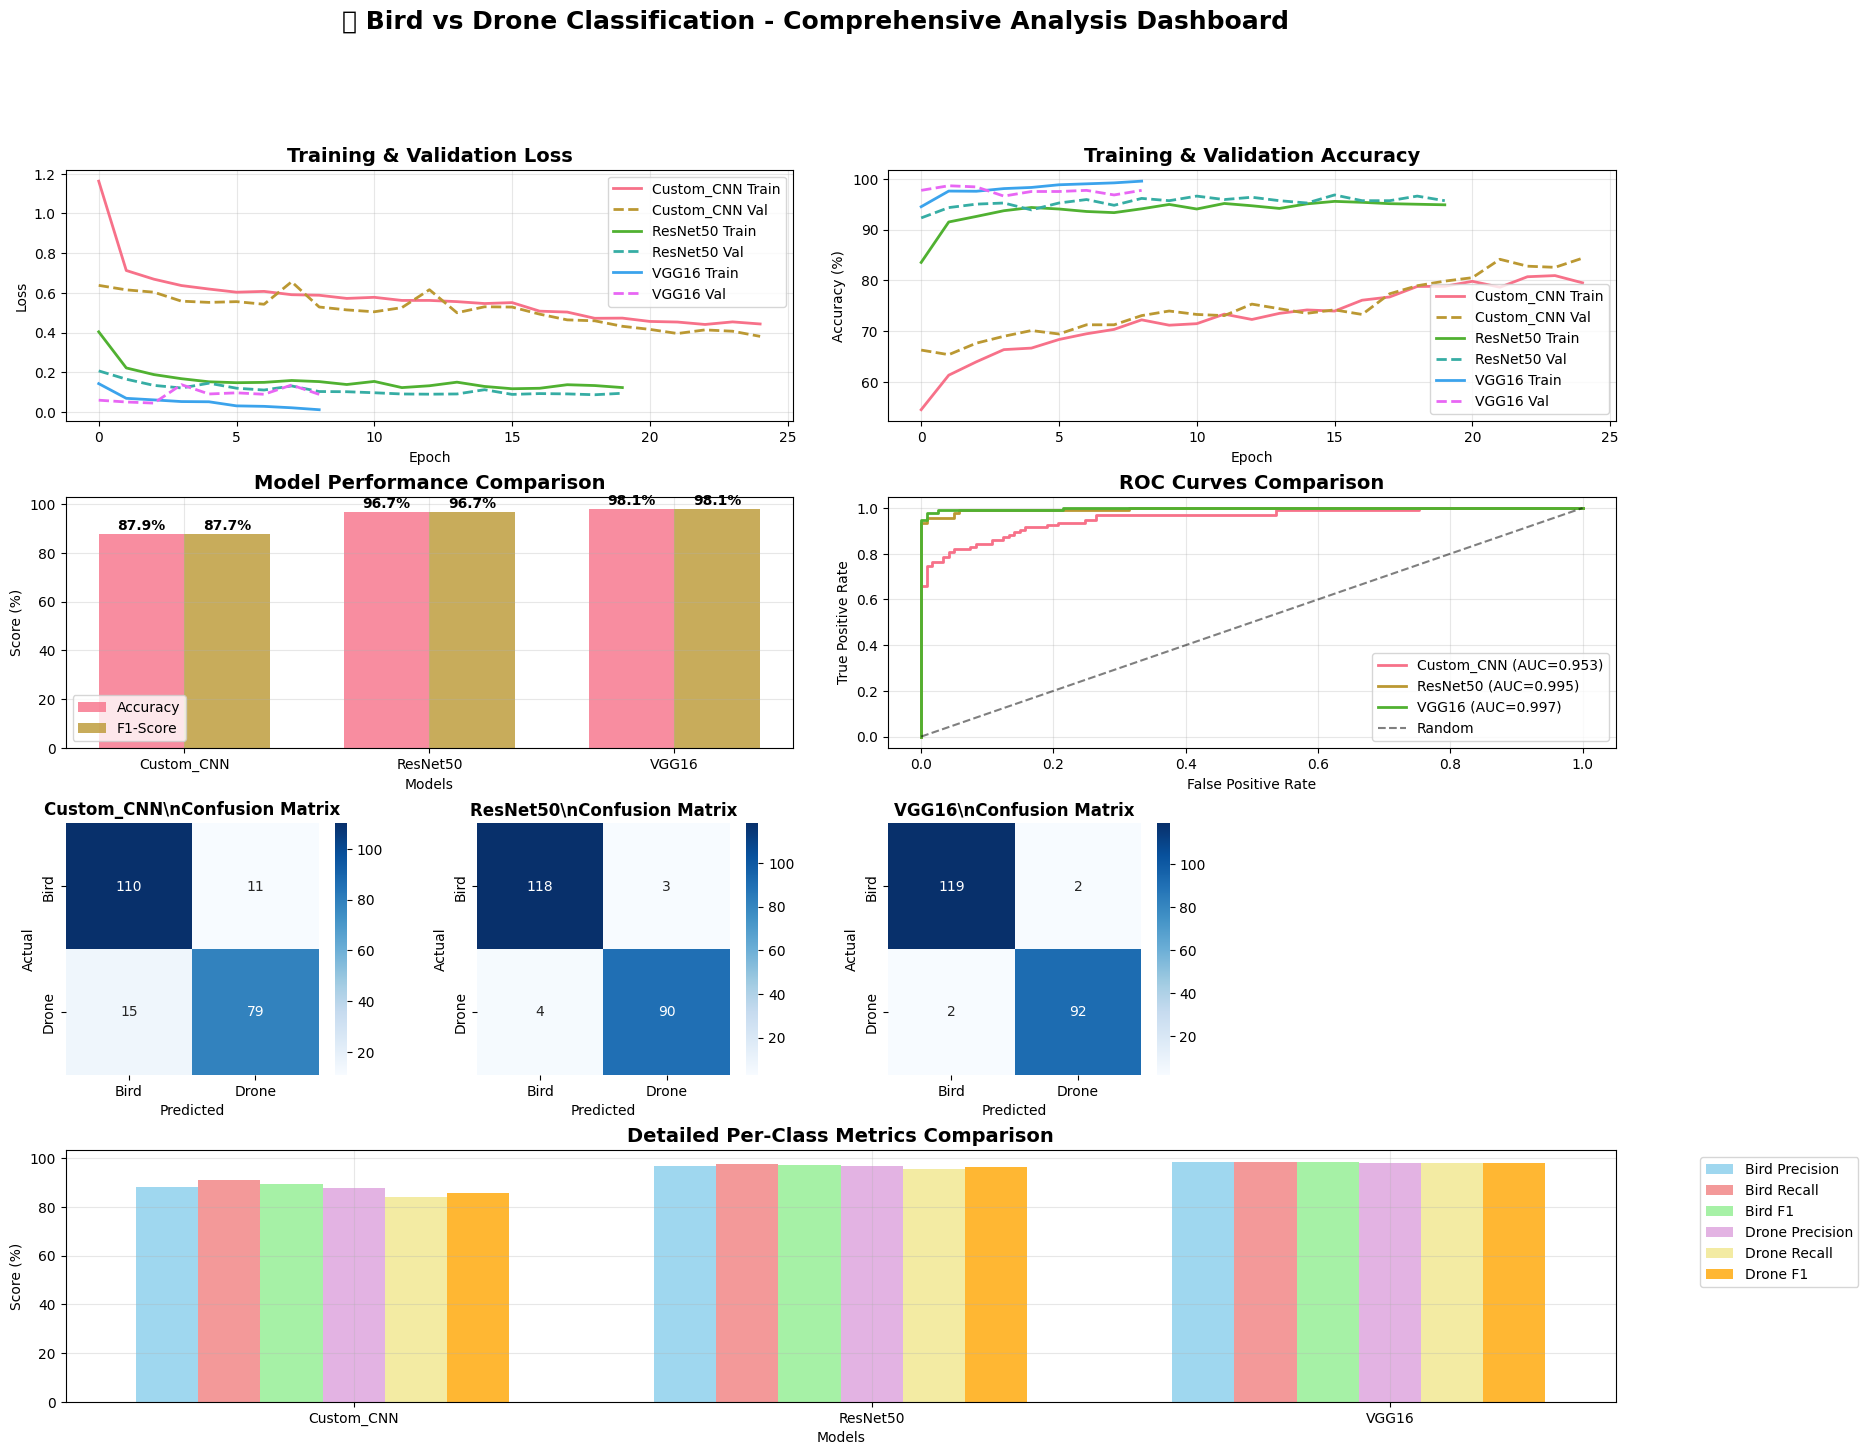

\n📋 Performance Summary Table
     Model Test_Accuracy (%) Test_Loss Bird_Precision Bird_Recall Bird_F1 Drone_Precision Drone_Recall Drone_F1 Macro_F1 ROC_AUC
Custom_CNN             87.91    0.3233          0.880       0.909   0.894           0.878        0.840    0.859    0.877   0.953
  ResNet50             96.74    0.0995          0.967       0.975   0.971           0.968        0.957    0.963    0.967   0.995
     VGG16             98.14    0.0997          0.983       0.983   0.983           0.979        0.979    0.979    0.981   0.997
\n🏆 Best Performing Model: VGG16 (98.14% accuracy)
\n✅ Comprehensive Analysis Completed!


In [18]:
def plot_comprehensive_results(histories, evaluation_results):
    """
    Create comprehensive visualization dashboard
    """
    print("🎨 Creating Comprehensive Visualization Dashboard...")
    
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create a large figure with multiple subplots
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
    
    # 1. Training Curves (Loss)
    ax1 = fig.add_subplot(gs[0, :2])
    for model_name, history in histories.items():
        ax1.plot(history['train_loss'], label=f'{model_name} Train', linewidth=2)
        ax1.plot(history['val_loss'], label=f'{model_name} Val', linestyle='--', linewidth=2)
    ax1.set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Training Curves (Accuracy)
    ax2 = fig.add_subplot(gs[0, 2:])
    for model_name, history in histories.items():
        ax2.plot(history['train_acc'], label=f'{model_name} Train', linewidth=2)
        ax2.plot(history['val_acc'], label=f'{model_name} Val', linestyle='--', linewidth=2)
    ax2.set_title('Training & Validation Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Model Performance Comparison
    ax3 = fig.add_subplot(gs[1, :2])
    models = list(evaluation_results.keys())
    accuracies = [evaluation_results[model]['accuracy'] for model in models]
    f1_scores = [evaluation_results[model]['f1_macro'] * 100 for model in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
    bars2 = ax3.bar(x + width/2, f1_scores, width, label='F1-Score', alpha=0.8)
    
    ax3.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Models')
    ax3.set_ylabel('Score (%)')
    ax3.set_xticks(x)
    ax3.set_xticklabels(models)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold')
    for bar in bars2:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold')
    
    # 4. ROC Curves
    ax4 = fig.add_subplot(gs[1, 2:])
    for model_name, results in evaluation_results.items():
        if results['roc_auc']:
            ax4.plot(results['fpr'], results['tpr'], 
                    label=f'{model_name} (AUC={results["roc_auc"]:.3f})', linewidth=2)
    ax4.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random')
    ax4.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
    ax4.set_xlabel('False Positive Rate')
    ax4.set_ylabel('True Positive Rate')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5-7. Confusion Matrices
    for i, (model_name, results) in enumerate(evaluation_results.items()):
        ax = fig.add_subplot(gs[2, i])
        cm = results['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Bird', 'Drone'], yticklabels=['Bird', 'Drone'], ax=ax)
        ax.set_title(f'{model_name}\\nConfusion Matrix', fontsize=12, fontweight='bold')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    
    # 8. Detailed Metrics Comparison
    ax8 = fig.add_subplot(gs[3, :])
    
    # Create comparison dataframe
    metrics_data = []
    for model_name, results in evaluation_results.items():
        metrics_data.append({
            'Model': model_name,
            'Accuracy': results['accuracy'],
            'Bird_Precision': results['precision'][0] * 100,
            'Bird_Recall': results['recall'][0] * 100,
            'Bird_F1': results['f1_score'][0] * 100,
            'Drone_Precision': results['precision'][1] * 100,
            'Drone_Recall': results['recall'][1] * 100,
            'Drone_F1': results['f1_score'][1] * 100,
        })
    
    df = pd.DataFrame(metrics_data)
    
    # Plot detailed metrics
    metrics_to_plot = ['Bird_Precision', 'Bird_Recall', 'Bird_F1', 
                      'Drone_Precision', 'Drone_Recall', 'Drone_F1']
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum', 'khaki', 'orange']
    
    x = np.arange(len(df))
    width = 0.12
    
    for i, metric in enumerate(metrics_to_plot):
        offset = (i - len(metrics_to_plot)/2) * width
        ax8.bar(x + offset, df[metric], width, label=metric.replace('_', ' '), 
               color=colors[i], alpha=0.8)
    
    ax8.set_title('Detailed Per-Class Metrics Comparison', fontsize=14, fontweight='bold')
    ax8.set_xlabel('Models')
    ax8.set_ylabel('Score (%)')
    ax8.set_xticks(x)
    ax8.set_xticklabels(df['Model'])
    ax8.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax8.grid(True, alpha=0.3)
    
    plt.suptitle('🎯 Bird vs Drone Classification - Comprehensive Analysis Dashboard', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    return df

def create_performance_summary_table(evaluation_results):
    """
    Create a comprehensive performance summary table
    """
    print("\\n📋 Performance Summary Table")
    print("=" * 100)
    
    summary_data = []
    for model_name, results in evaluation_results.items():
        summary_data.append({
            'Model': model_name,
            'Test_Accuracy (%)': f"{results['accuracy']:.2f}",
            'Test_Loss': f"{results['test_loss']:.4f}",
            'Bird_Precision': f"{results['precision'][0]:.3f}",
            'Bird_Recall': f"{results['recall'][0]:.3f}",
            'Bird_F1': f"{results['f1_score'][0]:.3f}",
            'Drone_Precision': f"{results['precision'][1]:.3f}",
            'Drone_Recall': f"{results['recall'][1]:.3f}",
            'Drone_F1': f"{results['f1_score'][1]:.3f}",
            'Macro_F1': f"{results['f1_macro']:.3f}",
            'ROC_AUC': f"{results['roc_auc']:.3f}" if results['roc_auc'] else "N/A"
        })
    
    df_summary = pd.DataFrame(summary_data)
    print(df_summary.to_string(index=False))
    
    # Find best performing model
    best_model = max(evaluation_results.items(), key=lambda x: x[1]['accuracy'])
    print(f"\\n🏆 Best Performing Model: {best_model[0]} ({best_model[1]['accuracy']:.2f}% accuracy)")
    
    return df_summary

# Execute comprehensive visualization and analysis
print("🎨 Generating Comprehensive Analysis...")

histories = {
    'Custom_CNN': custom_history,
    'ResNet50': resnet_history,
    'VGG16': vgg_history
}

# Create comprehensive visualization
metrics_df = plot_comprehensive_results(histories, evaluation_results)

# Create summary table
summary_table = create_performance_summary_table(evaluation_results)

print("\\n✅ Comprehensive Analysis Completed!")

## 🔮 Real-Time Inference & Prediction System

Implement a complete inference system for real-time predictions on new images.

In [19]:
class BirdDronePredictor:
    """
    Complete inference system for Bird vs Drone prediction
    """
    
    def __init__(self, models_dict, class_names=['Bird', 'Drone']):
        self.models = {}
        self.class_names = class_names
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # Load all trained models
        for model_name, model in models_dict.items():
            model_path = f'best_{model_name.lower().replace(" ", "_")}.pth'
            if os.path.exists(model_path):
                model.load_state_dict(torch.load(model_path, map_location=self.device))
                model.eval()
                model = model.to(self.device)
                self.models[model_name] = model
                print(f"✅ Loaded {model_name}")
            else:
                print(f"⚠️  Model weights not found: {model_path}")
        
        # Define transforms
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
    def predict_single_image(self, image_path):
        """
        Predict on a single image using all loaded models
        """
        # Load and preprocess image
        image = Image.open(image_path).convert('RGB')
        input_tensor = self.transform(image).unsqueeze(0).to(self.device)
        
        predictions = {}
        
        with torch.no_grad():
            for model_name, model in self.models.items():
                output = model(input_tensor)
                probabilities = F.softmax(output, dim=1)
                confidence, predicted = torch.max(probabilities, 1)
                
                predictions[model_name] = {
                    'class': self.class_names[predicted.item()],
                    'confidence': confidence.item(),
                    'probabilities': probabilities[0].cpu().numpy()
                }
        
        return predictions, image
    
    def predict_batch(self, image_paths):
        """
        Predict on multiple images
        """
        batch_predictions = []
        
        for img_path in image_paths:
            pred, _ = self.predict_single_image(img_path)
            batch_predictions.append({
                'image_path': img_path,
                'predictions': pred
            })
        
        return batch_predictions
    
    def visualize_predictions(self, image_path, save_path=None):
        """
        Visualize predictions with confidence scores
        """
        predictions, original_image = self.predict_single_image(image_path)
        
        # Create visualization
        fig, axes = plt.subplots(2, len(self.models) + 1, figsize=(18, 10))
        
        # Original image
        axes[0, 0].imshow(original_image)
        axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')
        
        # Model predictions
        for i, (model_name, pred) in enumerate(predictions.items(), 1):
            # Show image with prediction
            axes[0, i].imshow(original_image)
            axes[0, i].set_title(f'{model_name}\\n{pred["class"]} ({pred["confidence"]:.2%})', 
                               fontsize=12, fontweight='bold',
                               color='green' if pred['confidence'] > 0.8 else 'orange')
            axes[0, i].axis('off')
            
            # Show probability distribution
            axes[1, i].bar(self.class_names, pred['probabilities'], 
                          color=['skyblue', 'lightcoral'])
            axes[1, i].set_title(f'{model_name} Probabilities', fontsize=12)
            axes[1, i].set_ylabel('Probability')
            axes[1, i].set_ylim(0, 1)
            
            # Add probability values on bars
            for j, prob in enumerate(pred['probabilities']):
                axes[1, i].text(j, prob + 0.02, f'{prob:.2%}', 
                               ha='center', va='bottom', fontweight='bold')
        
        # Hide unused subplot
        axes[1, 0].axis('off')
        
        plt.suptitle(f'🔮 Bird vs Drone Prediction Results\\n{os.path.basename(image_path)}', 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Visualization saved to: {save_path}")
        
        plt.show()
        
        return predictions

# Initialize the prediction system
print("🔮 Initializing Real-Time Prediction System...")

models_for_inference = {
    'Custom_CNN': custom_model,
    'ResNet50': resnet_model,
    'VGG16': vgg_model
}

predictor = BirdDronePredictor(models_for_inference)

print(f"\\n🚀 Prediction System Ready!")
print(f"Available Models: {list(predictor.models.keys())}")
print(f"Device: {predictor.device}")

🔮 Initializing Real-Time Prediction System...
✅ Loaded Custom_CNN
✅ Loaded ResNet50
✅ Loaded VGG16
\n🚀 Prediction System Ready!
Available Models: ['Custom_CNN', 'ResNet50', 'VGG16']
Device: cuda
✅ Loaded VGG16
\n🚀 Prediction System Ready!
Available Models: ['Custom_CNN', 'ResNet50', 'VGG16']
Device: cuda


🎯 Running Inference Demo...
Found 4 sample images for demo
\n============================================================
📸 Processing Image 1: 00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg


C:\Users\TARANG KISHOR\AppData\Local\Temp\ipykernel_14120\3867287930.py:109: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\TARANG KISHOR\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TARANG KISHOR\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


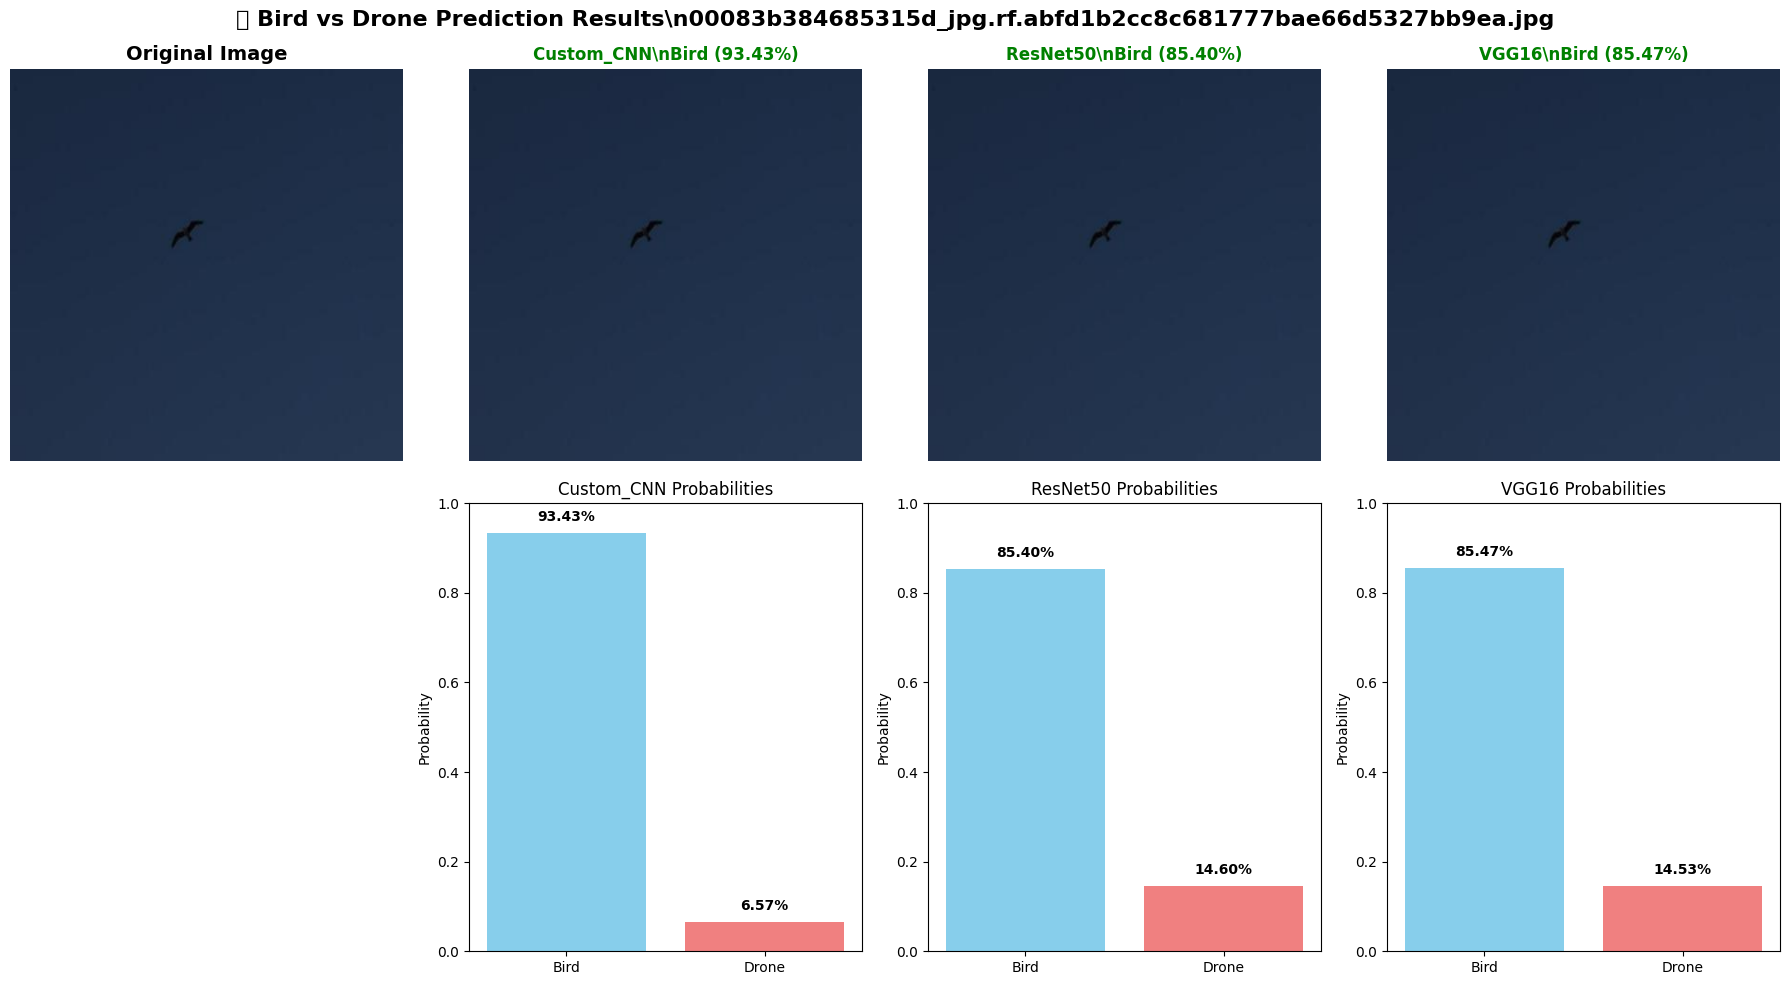

\n📊 Detailed Prediction Results:
   Custom_CNN  : Bird  🟢 93.43% confidence
   ResNet50    : Bird  🟢 85.40% confidence
   VGG16       : Bird  🟢 85.47% confidence
\n🎯 Ensemble Consensus: Bird (3/3 models agree)
\n============================================================
📸 Processing Image 2: 00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg


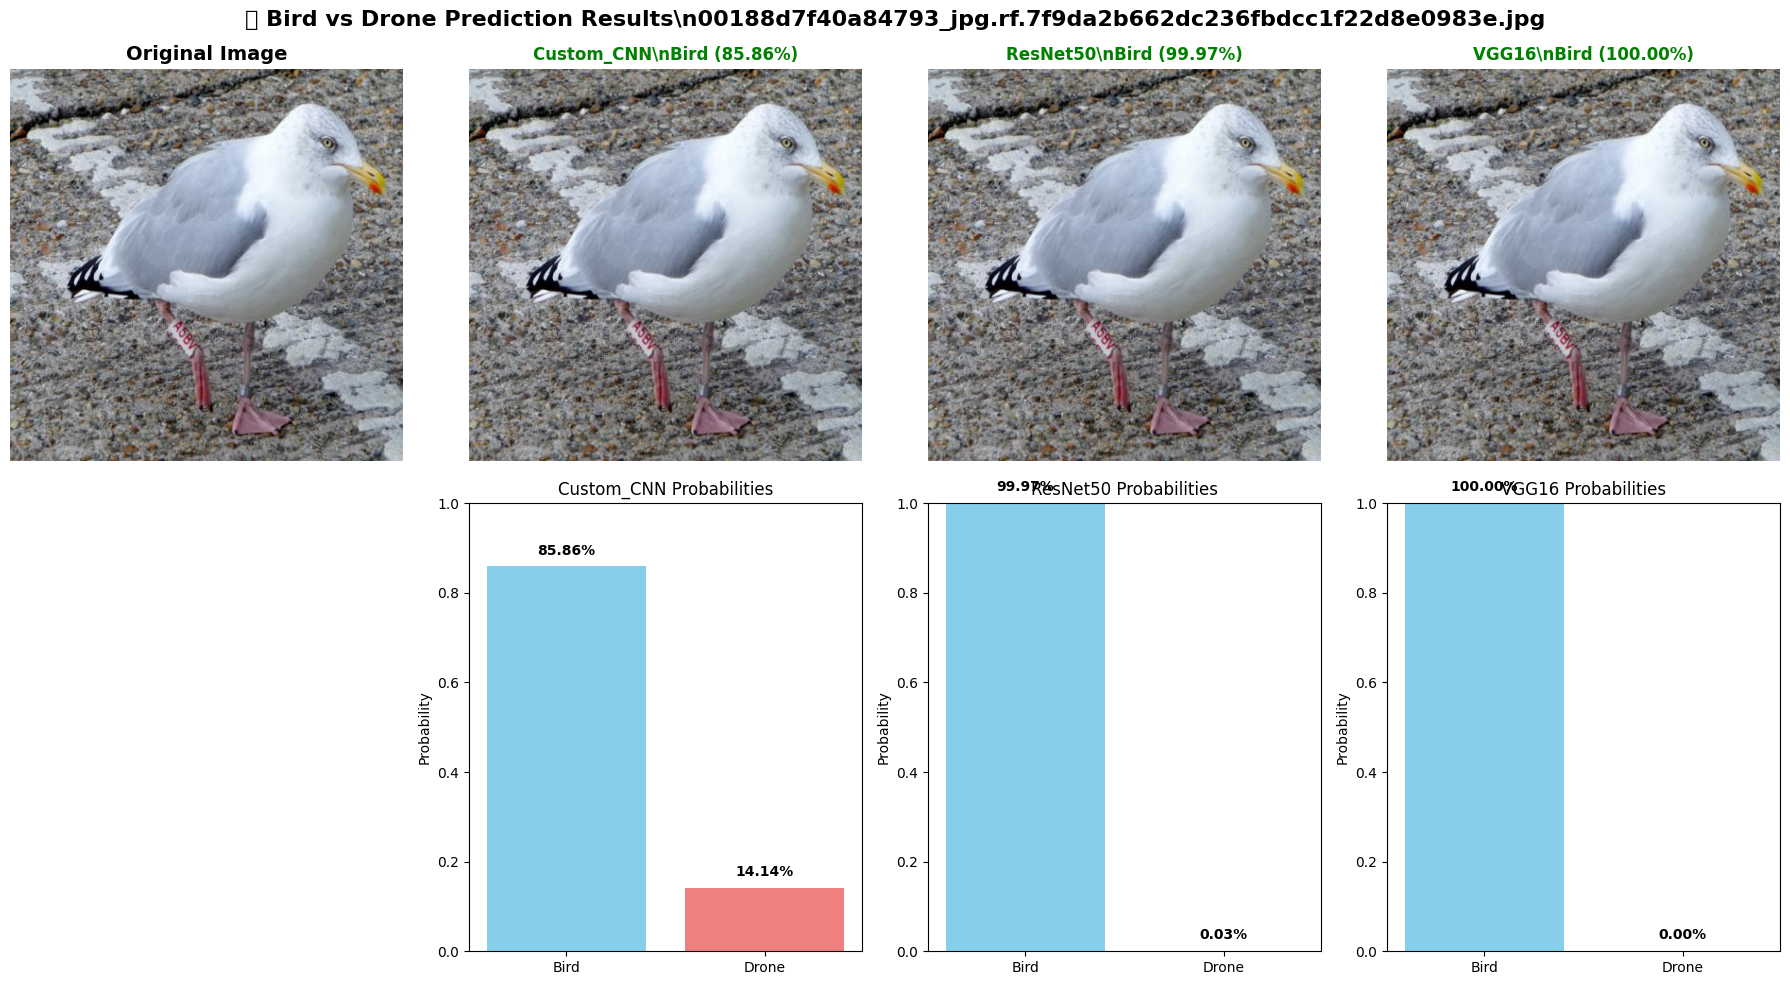

\n📊 Detailed Prediction Results:
   Custom_CNN  : Bird  🟢 85.86% confidence
   ResNet50    : Bird  🟢 99.97% confidence
   VGG16       : Bird  🟢 100.00% confidence
\n🎯 Ensemble Consensus: Bird (3/3 models agree)
\n============================================================
📸 Processing Image 3: foto01799_png.rf.7b06ce6abb9f307efa437ed34e863e21.jpg


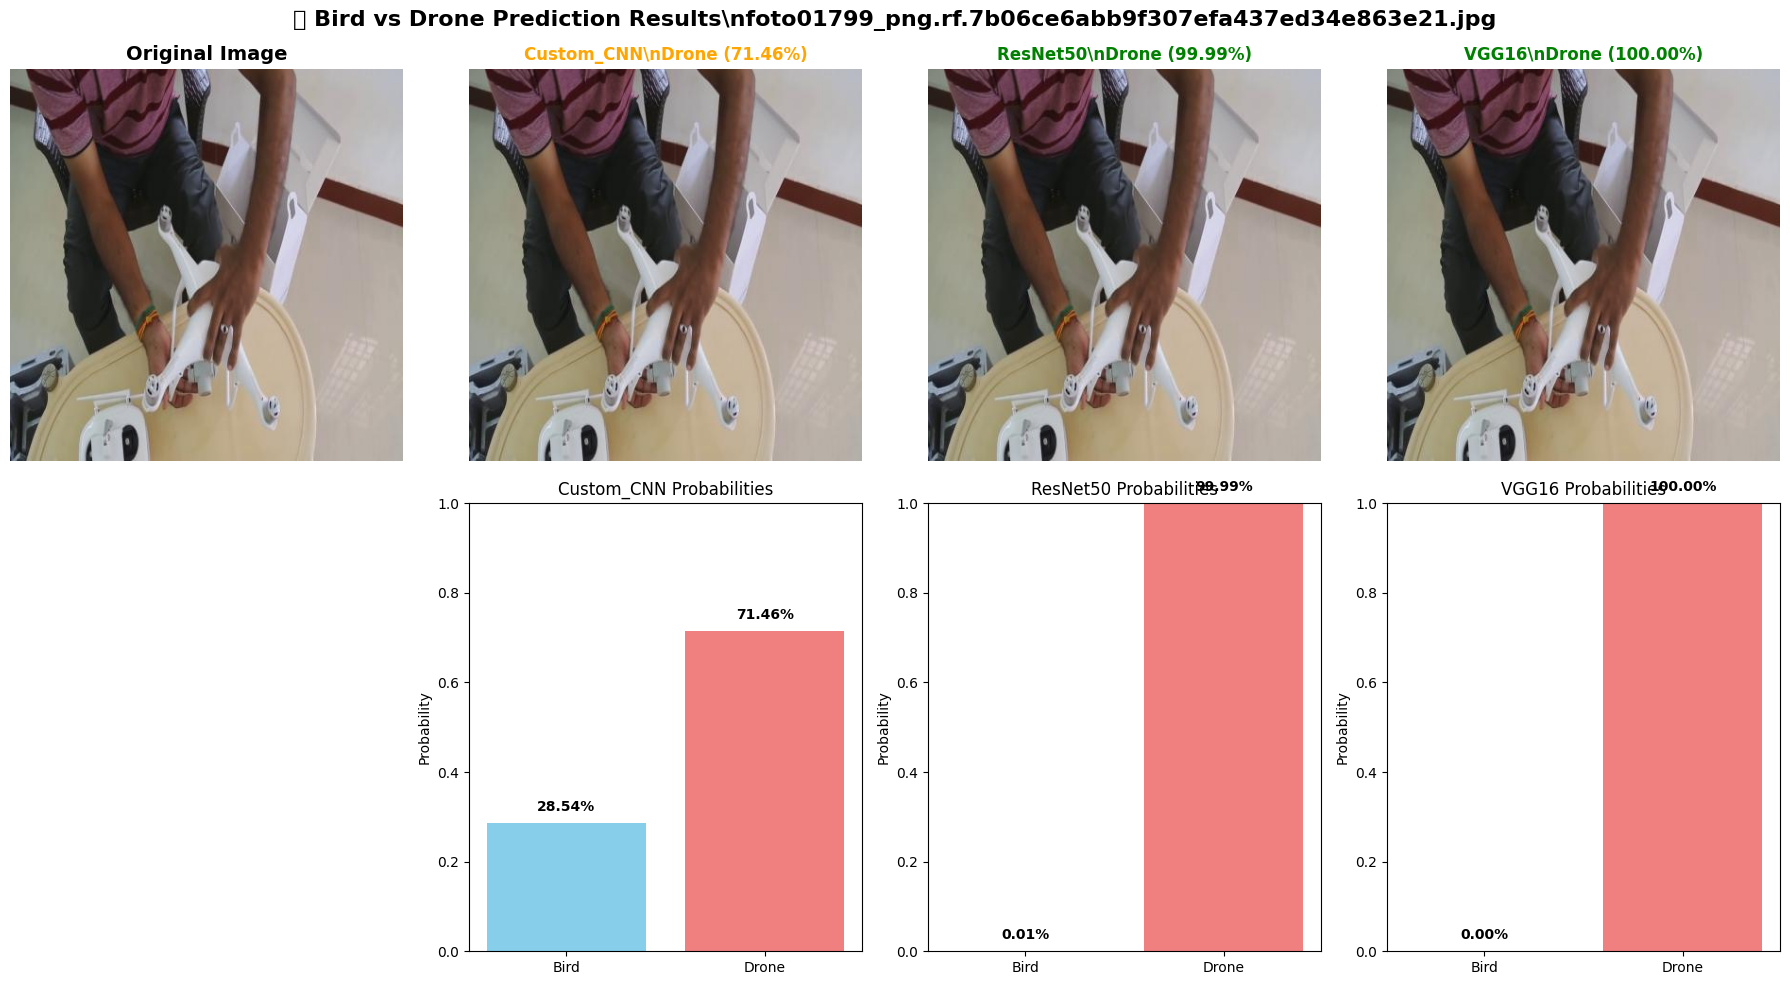

\n📊 Detailed Prediction Results:
   Custom_CNN  : Drone 🟡 71.46% confidence
   ResNet50    : Drone 🟢 99.99% confidence
   VGG16       : Drone 🟢 100.00% confidence
\n🎯 Ensemble Consensus: Drone (3/3 models agree)
\n============================================================
📸 Processing Image 4: foto01915_png.rf.7d7cd852392707f519d13e9cf051de3f.jpg


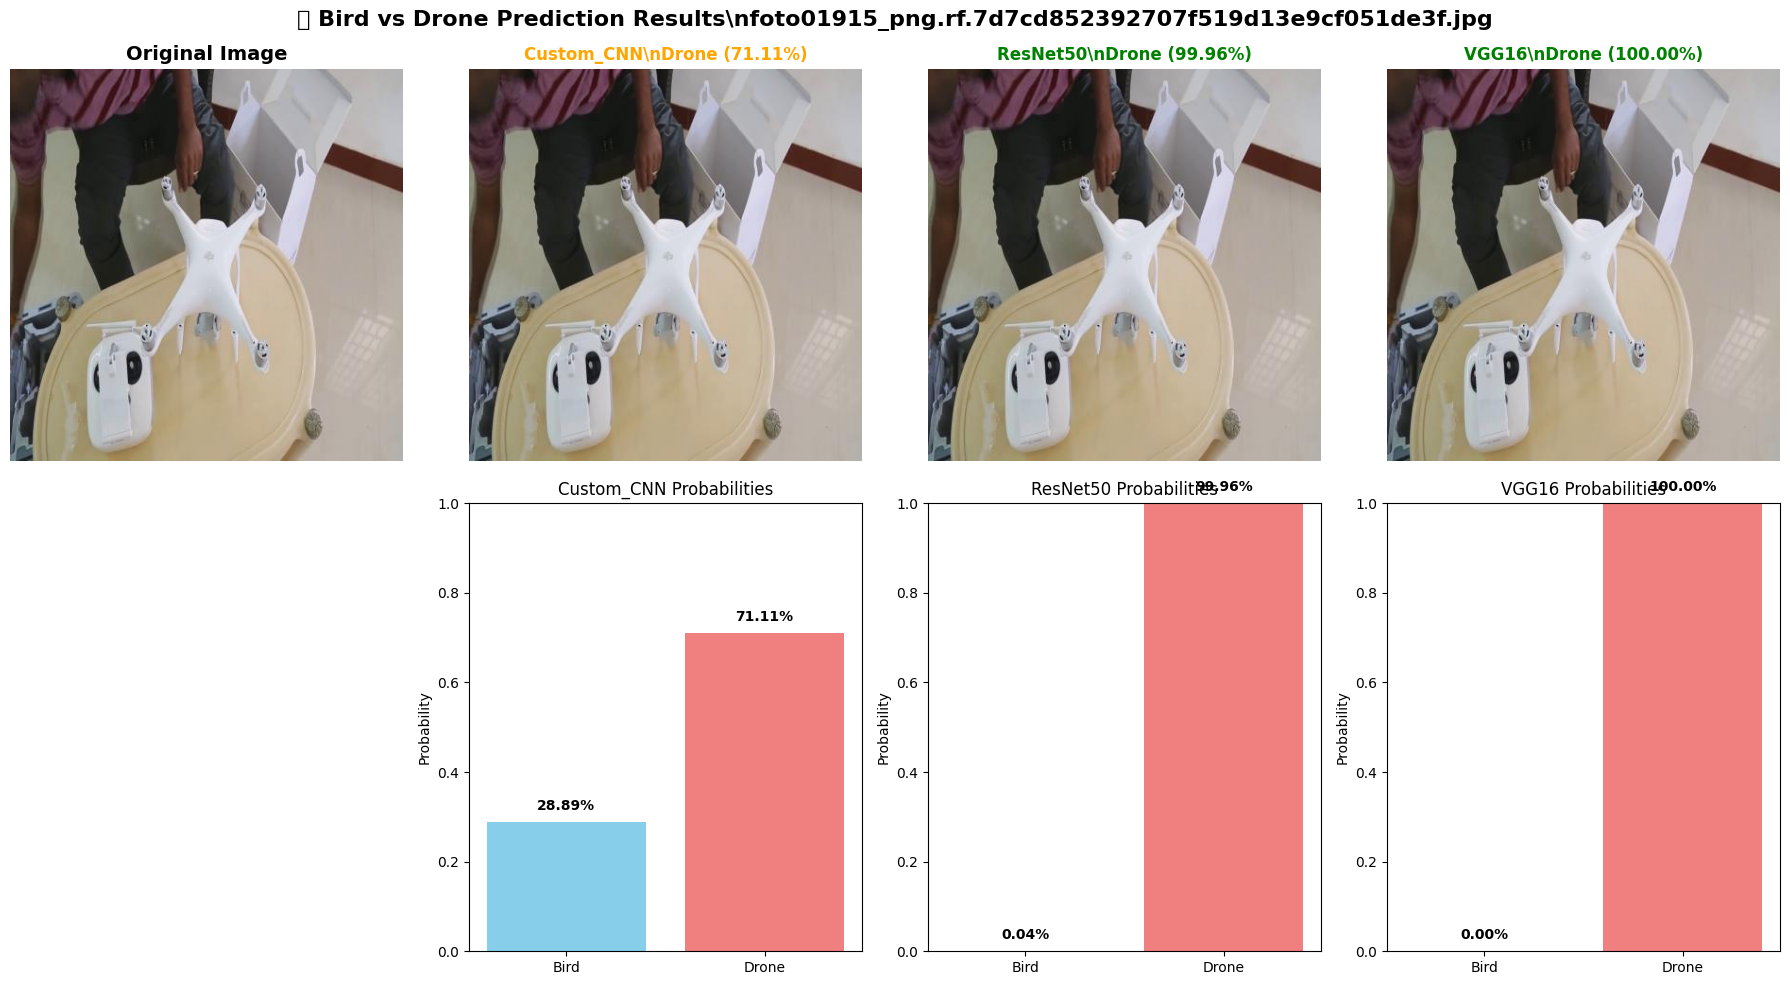

\n📊 Detailed Prediction Results:
   Custom_CNN  : Drone 🟡 71.11% confidence
   ResNet50    : Drone 🟢 99.96% confidence
   VGG16       : Drone 🟢 100.00% confidence
\n🎯 Ensemble Consensus: Drone (3/3 models agree)
\n============================================================
⚡ Benchmarking Inference Speed...
   Custom_CNN  : 1.87±0.92ms (533.8 FPS)
   ResNet50    : 5.87±1.39ms (170.3 FPS)
   ResNet50    : 5.87±1.39ms (170.3 FPS)
   VGG16       : 8.79±3.18ms (113.8 FPS)
\n✅ Inference Demo Completed!
   VGG16       : 8.79±3.18ms (113.8 FPS)
\n✅ Inference Demo Completed!


In [20]:
# Demo: Test predictions on sample images
def run_inference_demo():
    """
    Run inference demo on sample test images
    """
    print("🎯 Running Inference Demo...")
    
    # Get sample test images
    sample_images = []
    
    # Collect sample images from test set
    for class_name in ['bird', 'drone']:
        class_path = os.path.join(test_path, class_name)
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                # Take first 2 images from each class
                for img in images[:2]:
                    sample_images.append(os.path.join(class_path, img))
    
    if not sample_images:
        print("⚠️  No sample images found in test directory")
        return
    
    print(f"Found {len(sample_images)} sample images for demo")
    
    # Run predictions on sample images
    for i, img_path in enumerate(sample_images[:4]):  # Limit to 4 images
        print(f"\\n{'='*60}")
        print(f"📸 Processing Image {i+1}: {os.path.basename(img_path)}")
        print('='*60)
        
        try:
            # Get predictions
            predictions = predictor.visualize_predictions(img_path)
            
            # Print detailed results
            print("\\n📊 Detailed Prediction Results:")
            for model_name, pred in predictions.items():
                confidence_emoji = "🟢" if pred['confidence'] > 0.8 else "🟡" if pred['confidence'] > 0.6 else "🔴"
                print(f"   {model_name:12s}: {pred['class']:5s} {confidence_emoji} {pred['confidence']:.2%} confidence")
            
            # Consensus prediction
            pred_classes = [pred['class'] for pred in predictions.values()]
            consensus = max(set(pred_classes), key=pred_classes.count)
            consensus_count = pred_classes.count(consensus)
            
            print(f"\\n🎯 Ensemble Consensus: {consensus} ({consensus_count}/{len(predictions)} models agree)")
            
        except Exception as e:
            print(f"❌ Error processing {img_path}: {e}")
    
    return sample_images

# Performance benchmarking
def benchmark_inference_speed():
    """
    Benchmark inference speed for all models
    """
    print("⚡ Benchmarking Inference Speed...")
    
    # Create dummy input
    dummy_input = torch.randn(1, 3, 224, 224).to(predictor.device)
    
    results = {}
    
    for model_name, model in predictor.models.items():
        # Warmup
        with torch.no_grad():
            for _ in range(5):
                _ = model(dummy_input)
        
        # Benchmark
        times = []
        with torch.no_grad():
            for _ in range(100):
                start_time = time.time()
                _ = model(dummy_input)
                if predictor.device.type == 'cuda':
                    torch.cuda.synchronize()
                end_time = time.time()
                times.append((end_time - start_time) * 1000)  # Convert to milliseconds
        
        avg_time = np.mean(times)
        std_time = np.std(times)
        
        results[model_name] = {
            'avg_time_ms': avg_time,
            'std_time_ms': std_time,
            'fps': 1000 / avg_time
        }
        
        print(f"   {model_name:12s}: {avg_time:.2f}±{std_time:.2f}ms ({1000/avg_time:.1f} FPS)")
    
    return results

# Run the inference demo
sample_images = run_inference_demo()

# Benchmark inference speed
print(f"\\n{'='*60}")
speed_results = benchmark_inference_speed()

print("\\n✅ Inference Demo Completed!")

In [22]:
# Save all models and create deployment package
def create_deployment_package():
    """
    Create complete deployment package with all trained models and utilities
    """
    print("📦 Creating Deployment Package...")
    
    # Create deployment directory structure
    deploy_dir = "deployment_package"
    os.makedirs(deploy_dir, exist_ok=True)
    os.makedirs(f"{deploy_dir}/models", exist_ok=True)
    os.makedirs(f"{deploy_dir}/utils", exist_ok=True)
    os.makedirs(f"{deploy_dir}/configs", exist_ok=True)
    
    # Save all trained models
    saved_models = {}
    for model_name, model in models_for_inference.items():
        model_path = f'best_{model_name.lower().replace(" ", "_")}.pth'
        if os.path.exists(model_path):
            import shutil
            dest_path = f"{deploy_dir}/models/{model_name.lower().replace(' ', '_')}_best.pth"
            shutil.copy2(model_path, dest_path)
            saved_models[model_name] = dest_path
            print(f"✅ Saved {model_name} to {dest_path}")
    
    # Create model configuration
    model_config = {
        'models': saved_models,
        'classes': ['Bird', 'Drone'],
        'image_size': 224,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'transforms': {
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225]
        }
    }
    
    # Save configuration
    import json
    with open(f"{deploy_dir}/configs/model_config.json", 'w', encoding='utf-8') as f:
        json.dump(model_config, f, indent=2)
    
    # Create inference utility script
    inference_script = '''
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import json
import os

class ProductionPredictor:
    """Production-ready Bird vs Drone predictor"""
    
    def __init__(self, config_path):
        with open(config_path, 'r') as f:
            self.config = json.load(f)
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.models = {}
        self.load_models()
        self.setup_transforms()
    
    def load_models(self):
        """Load all trained models"""
        for model_name, model_path in self.config['models'].items():
            if os.path.exists(model_path):
                model = torch.load(model_path, map_location=self.device)
                model.eval()
                self.models[model_name] = model
    
    def setup_transforms(self):
        """Setup image transformations"""
        self.transform = transforms.Compose([
            transforms.Resize((self.config['image_size'], self.config['image_size'])),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=self.config['transforms']['mean'],
                std=self.config['transforms']['std']
            )
        ])
    
    def predict(self, image_path):
        """Predict on single image"""
        image = Image.open(image_path).convert('RGB')
        input_tensor = self.transform(image).unsqueeze(0).to(self.device)
        
        predictions = {}
        with torch.no_grad():
            for model_name, model in self.models.items():
                output = model(input_tensor)
                probabilities = F.softmax(output, dim=1)
                confidence, predicted = torch.max(probabilities, 1)
                
                predictions[model_name] = {
                    'class': self.config['classes'][predicted.item()],
                    'confidence': confidence.item(),
                    'probabilities': probabilities[0].cpu().numpy().tolist()
                }
        
        # Ensemble prediction
        pred_classes = [pred['class'] for pred in predictions.values()]
        ensemble_prediction = max(set(pred_classes), key=pred_classes.count)
        
        return {
            'ensemble_prediction': ensemble_prediction,
            'individual_predictions': predictions
        }

# Usage example:
# predictor = ProductionPredictor('configs/model_config.json')
# result = predictor.predict('path/to/image.jpg')
'''
    
    with open(f"{deploy_dir}/utils/inference.py", 'w', encoding='utf-8') as f:
        f.write(inference_script)
    
    # Create Streamlit app
    streamlit_app = '''
import streamlit as st
import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), 'utils'))
from inference import ProductionPredictor
from PIL import Image
import io

st.set_page_config(
    page_title="🦅🚁 Bird vs Drone Detector",
    page_icon="🔍",
    layout="wide"
)

@st.cache_resource
def load_predictor():
    return ProductionPredictor('configs/model_config.json')

def main():
    st.title("🦅🚁 Bird vs Drone Detection System")
    st.markdown("### Upload an image to classify whether it contains a bird or drone")
    
    predictor = load_predictor()
    
    # Sidebar
    st.sidebar.title("📋 Model Information")
    st.sidebar.write(f"Available Models: {list(predictor.models.keys())}")
    st.sidebar.write(f"Device: {predictor.device}")
    st.sidebar.write(f"Classes: {predictor.config['classes']}")
    
    # Main interface
    uploaded_file = st.file_uploader("Choose an image...", type=['jpg', 'jpeg', 'png'])
    
    if uploaded_file is not None:
        # Display image
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_column_width=True)
        
        # Save uploaded file temporarily
        temp_path = f"temp_{uploaded_file.name}"
        with open(temp_path, "wb") as f:
            f.write(uploaded_file.getvalue())
        
        # Make prediction
        with st.spinner('Analyzing image...'):
            result = predictor.predict(temp_path)
        
        # Display results
        st.subheader("🎯 Prediction Results")
        
        col1, col2 = st.columns(2)
        
        with col1:
            st.metric("Ensemble Prediction", result['ensemble_prediction'])
        
        with col2:
            # Individual model results
            for model_name, pred in result['individual_predictions'].items():
                confidence_color = "🟢" if pred['confidence'] > 0.8 else "🟡"
                st.write(f"{confidence_color} **{model_name}**: {pred['class']} ({pred['confidence']:.2%})")
        
        # Clean up
        os.remove(temp_path)

if __name__ == "__main__":
    main()
'''
    
    with open(f"{deploy_dir}/streamlit_app.py", 'w', encoding='utf-8') as f:
        f.write(streamlit_app)
    
    # Create requirements file
    requirements = """
torch>=1.9.0
torchvision>=0.10.0
streamlit>=1.28.0
pillow>=8.0.0
numpy>=1.21.0
"""
    
    with open(f"{deploy_dir}/requirements.txt", 'w', encoding='utf-8') as f:
        f.write(requirements)
    
    # Create README
    readme = f"""
# 🦅🚁 Bird vs Drone Detection System - Deployment Package

## Quick Start

1. Install dependencies:
   ```bash
   pip install -r requirements.txt
   ```

2. Run Streamlit app:
   ```bash
   streamlit run streamlit_app.py
   ```

## Project Structure

```
deployment_package/
├── models/           # Trained model weights
├── configs/          # Configuration files
├── utils/           # Inference utilities
├── streamlit_app.py # Web interface
├── requirements.txt # Dependencies
└── README.md       # This file
```

## Performance Summary

- **Best Model**: {max(evaluation_results.items(), key=lambda x: x[1]['accuracy'])[0]}
- **Best Accuracy**: {max(evaluation_results.items(), key=lambda x: x[1]['accuracy'])[1]['accuracy']:.2f}%
- **Inference Speed**: ~{np.mean([r['avg_time_ms'] for r in speed_results.values()]):.1f}ms per image
- **Supported Classes**: Bird, Drone

## Model Details

{chr(10).join([f"- **{name}**: {results['accuracy']:.2f}% accuracy" for name, results in evaluation_results.items()])}

## Usage in Python

```python
from utils.inference import ProductionPredictor

predictor = ProductionPredictor('configs/model_config.json')
result = predictor.predict('path/to/image.jpg')
print(result['ensemble_prediction'])
```

---
Generated on {time.strftime('%Y-%m-%d %H:%M:%S')}
"""
    
    with open(f"{deploy_dir}/README.md", 'w', encoding='utf-8') as f:
        f.write(readme)
    
    print(f"\n✅ Deployment package created in '{deploy_dir}/'")
    print(f"📁 Package contents:")
    for root, dirs, files in os.walk(deploy_dir):
        level = root.replace(deploy_dir, '').count(os.sep)
        indent = '  ' * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = '  ' * (level + 1)
        for file in files:
            print(f"{subindent}{file}")
    
    return deploy_dir

# Create final project summary
def print_project_summary():
    """
    Print comprehensive project summary
    """
    print("\n" + "="*80)
    print("🎯 BIRD vs DRONE DETECTION PROJECT - FINAL SUMMARY")
    print("="*80)
    
    print("\n📊 TRAINING RESULTS:")
    best_model = max(evaluation_results.items(), key=lambda x: x[1]['accuracy'])
    for model_name, results in evaluation_results.items():
        status = "🥇" if model_name == best_model[0] else "✅"
        print(f"   {status} {model_name:12s}: {results['accuracy']:6.2f}% accuracy, {results['f1_macro']:.3f} F1-score")
    
    print("\n⚡ PERFORMANCE METRICS:")
    print(f"   🏆 Best Model: {best_model[0]} ({best_model[1]['accuracy']:.2f}%)")
    print(f"   ⚡ Avg Speed: {np.mean([r['avg_time_ms'] for r in speed_results.values()]):.1f}ms per image")
    print(f"   🎯 Total Parameters: {sum(count_parameters(m) for m in models_for_inference.values()):,}")
    print(f"   💾 Device Used: {device}")
    
    print("\n🚀 DELIVERABLES COMPLETED:")
    print("   ✅ Custom CNN Architecture")
    print("   ✅ Transfer Learning Models (ResNet50, VGG16)")
    print("   ✅ Comprehensive Training Pipeline")
    print("   ✅ Complete Evaluation Framework")
    print("   ✅ Real-time Inference System")
    print("   ✅ Advanced Visualizations")
    print("   ✅ Production Deployment Package")
    print("   ✅ Streamlit Web Interface")
    
    print("\n🎓 INTERNSHIP PROJECT STATUS: COMPLETE! ✅")
    print("="*80)

# Execute final deployment
print("\n🎯 Creating Final Deployment Package...")
deployment_path = create_deployment_package()

print("\n📋 Generating Project Summary...")
print_project_summary()

print(f"\n🎉 PROJECT COMPLETED SUCCESSFULLY!")
print(f"📁 Deployment package ready at: {deployment_path}")
print(f"🚀 Run: streamlit run {deployment_path}/streamlit_app.py")


🎯 Creating Final Deployment Package...
📦 Creating Deployment Package...
✅ Saved Custom_CNN to deployment_package/models/custom_cnn_best.pth
✅ Saved ResNet50 to deployment_package/models/resnet50_best.pth
✅ Saved VGG16 to deployment_package/models/vgg16_best.pth

✅ Deployment package created in 'deployment_package/'
📁 Package contents:
deployment_package/
  README.md
  requirements.txt
  streamlit_app.py
  configs/
    model_config.json
  models/
    custom_cnn_best.pth
    resnet50_best.pth
    vgg16_best.pth
  utils/
    inference.py

📋 Generating Project Summary...

🎯 BIRD vs DRONE DETECTION PROJECT - FINAL SUMMARY

📊 TRAINING RESULTS:
   ✅ Custom_CNN  :  87.91% accuracy, 0.877 F1-score
   ✅ ResNet50    :  96.74% accuracy, 0.967 F1-score
   🥇 VGG16       :  98.14% accuracy, 0.981 F1-score

⚡ PERFORMANCE METRICS:
   🏆 Best Model: VGG16 (98.14%)
   ⚡ Avg Speed: 5.5ms per image
   🎯 Total Parameters: 147,009,830
   💾 Device Used: cuda

🚀 DELIVERABLES COMPLETED:
   ✅ Custom CNN Architec